# Overview over input data

Mouse mouse1.acq with mean = -0.02480560509737787, max = -0.01708984375, min -0.03570556640625
data  = [-0.02655029 -0.02227783 -0.02838135 -0.02319336 -0.02258301 -0.0289917
 -0.02563477 -0.02410889 -0.02410889 -0.02593994 -0.02380371 -0.02532959
 -0.02410889 -0.02288818 -0.02380371 -0.02288818 -0.02593994 -0.02502441
 -0.02624512 -0.03051758]
Mouse mouse2.acq with mean = -0.022460670624424445, max = -0.0146484375, min -0.03173828125
data  = [-0.02197266 -0.02044678 -0.02380371 -0.02319336 -0.02197266 -0.02319336
 -0.0213623  -0.02258301 -0.02563477 -0.02044678 -0.02166748 -0.02502441
 -0.01922607 -0.02441406 -0.01983643 -0.02319336 -0.02349854 -0.01953125
 -0.02532959 -0.02349854]
Mouse mouse3.acq with mean = -0.026390416382230636, max = -0.01983642578125, min -0.03692626953125
data  = [-0.02685547 -0.02563477 -0.02990723 -0.02593994 -0.02593994 -0.02471924
 -0.0289917  -0.02746582 -0.02960205 -0.02716064 -0.02807617 -0.02593994
 -0.02685547 -0.02716064 -0.02624512 -0.02471924 -0.024

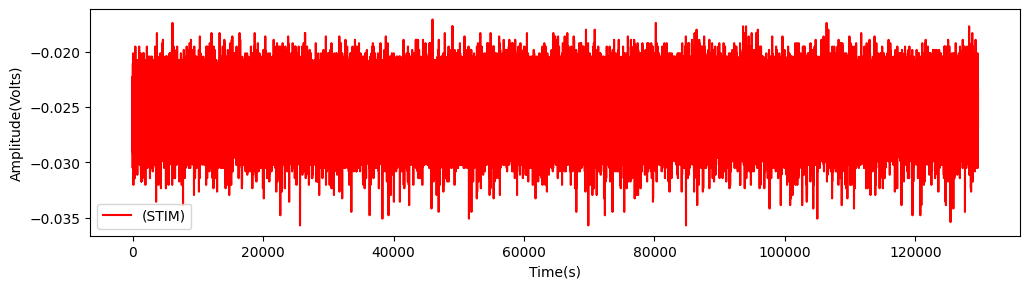

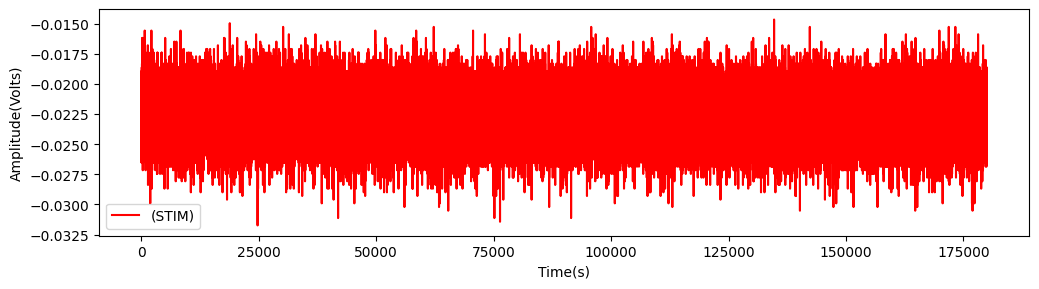

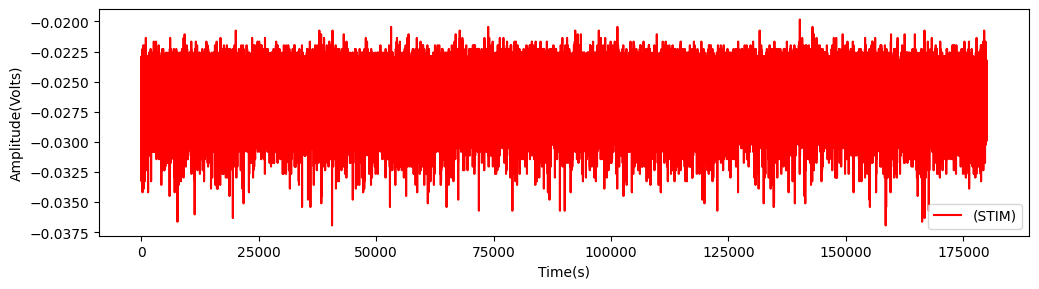

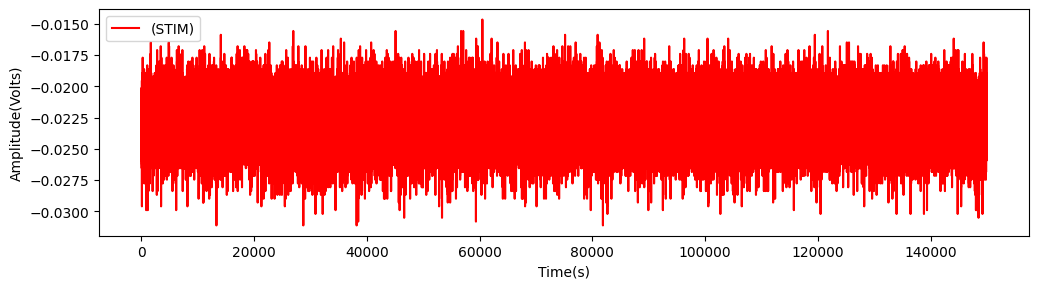

In [15]:
from engine.pipelines.internal.TimeSeries import TimeSeries
from engine.pipelines.internal.Spectrum import Spectrum
import bioread

def get_biopac_test_channel(file_name, wanted_biopac_channel):
    file_data = bioread.read_file("data/{}".format(file_name))
    
    for biopac_channel in file_data.channels:
        if biopac_channel.name == wanted_biopac_channel:
            return biopac_channel
    
    raise Exception("Check channel provided {}".format(wanted_biopac_channel))

file_name = "mouse2.acq"
biopac_channel = "ECoG F"
biopac_test_channel = get_biopac_test_channel(file_name, biopac_channel)
biopac_test_channel

In [ ]:
from engine.pipelines.internal.TimeSeries import TimeSeries
from engine.pipelines.internal.Spectrum import Spectrum
import bioread

def get_biopac_test_channel(file_name, wanted_biopac_channel):
    file_data = bioread.read_file("data/{}".format(file_name))
    
    for biopac_channel in file_data.channels:
        if biopac_channel.name == wanted_biopac_channel:
            return biopac_channel
    
    raise Exception("Check channel provided {}".format(wanted_biopac_channel))

file_name = "mouse4.acq"
biopac_channel = "STIM"
biopac_test_channel = get_biopac_test_channel(file_name, biopac_channel)
biopac_test_channel
test_time_series = TimeSeries(biopac_channel=biopac_test_channel)
test_time_series.plot()

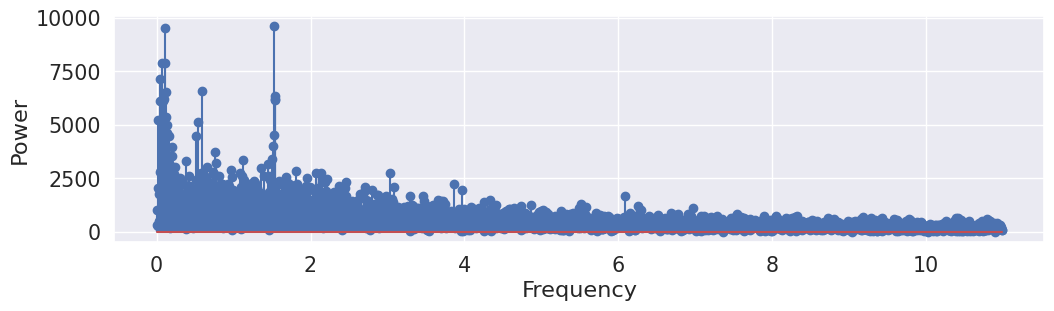

In [9]:
test_spectrum = Spectrum(test_time_series)
test_spectrum.plot(0, 12)

# Overview over t-SNE execution with default execution configuration

In [1]:
from engine.EEGVisualizer import EEGVisualizer

## Loaded intracranial EEGs

In [4]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.describe()

file_name mouse2.acq
	biopac_channel STIM
	biopac_channel EKG
	biopac_channel ECoG P
	biopac_channel ECoG F
file_name mouse1.acq
	biopac_channel STIM
	biopac_channel ECoG F
	biopac_channel ECoG P
file_name mouse4.acq
	biopac_channel STIM
	biopac_channel ECoG F
	biopac_channel ECoG P
	biopac_channel EKG
file_name mouse3.acq
	biopac_channel STIM
	biopac_channel ECoG F
	biopac_channel ECoG P


## Chosen execution configuration

In [5]:
from engine.configuration.ConfigurationLoader import ConfigurationLoader
ConfigurationLoader().get_default_configuration()

{'preprocessing_pipeline_stages': [{'stage_name': 'SplitInWindows',
   'constructor_kwargs': {'window_size': 1000}}],
 'processing_pipeline_stages': [{'stage_name': 'FeatureExtractor',
   'constructor_kwargs': {'features': ['alpha_spectrum_coeffiecients_sum',
     'beta_spectrum_coeffiecients_sum',
     'low_gamma_spectrum_coeffiecients_sum',
     'high_gamma_spectrum_coeffiecients_sum',
     'delta_spectrum_coeffiecients_sum',
     'theta_spectrum_coeffiecients_sum',
     'mean',
     'standard_deviation']}}],
 't_sne_models': [{'model_name': 'standard_parameters',
   'parameters': {'n_jobs': 6,
    'learning_rate': 'auto',
    'init': 'random',
    'n_components': 2,
    'early_exaggeration': 12,
    'perplexity': 30}},
  {'model_name': 'low_perplexity',
   'parameters': {'n_jobs': 6,
    'learning_rate': 'auto',
    'init': 'random',
    'n_components': 2,
    'early_exaggeration': 12,
    'perplexity': 5}},
  {'model_name': 'low_exageration',
   'parameters': {'n_jobs': 6,
    'lea

## With respect to mice

### Mouse1

#### Mouse1 with respect to Frontal and Parietal lobes

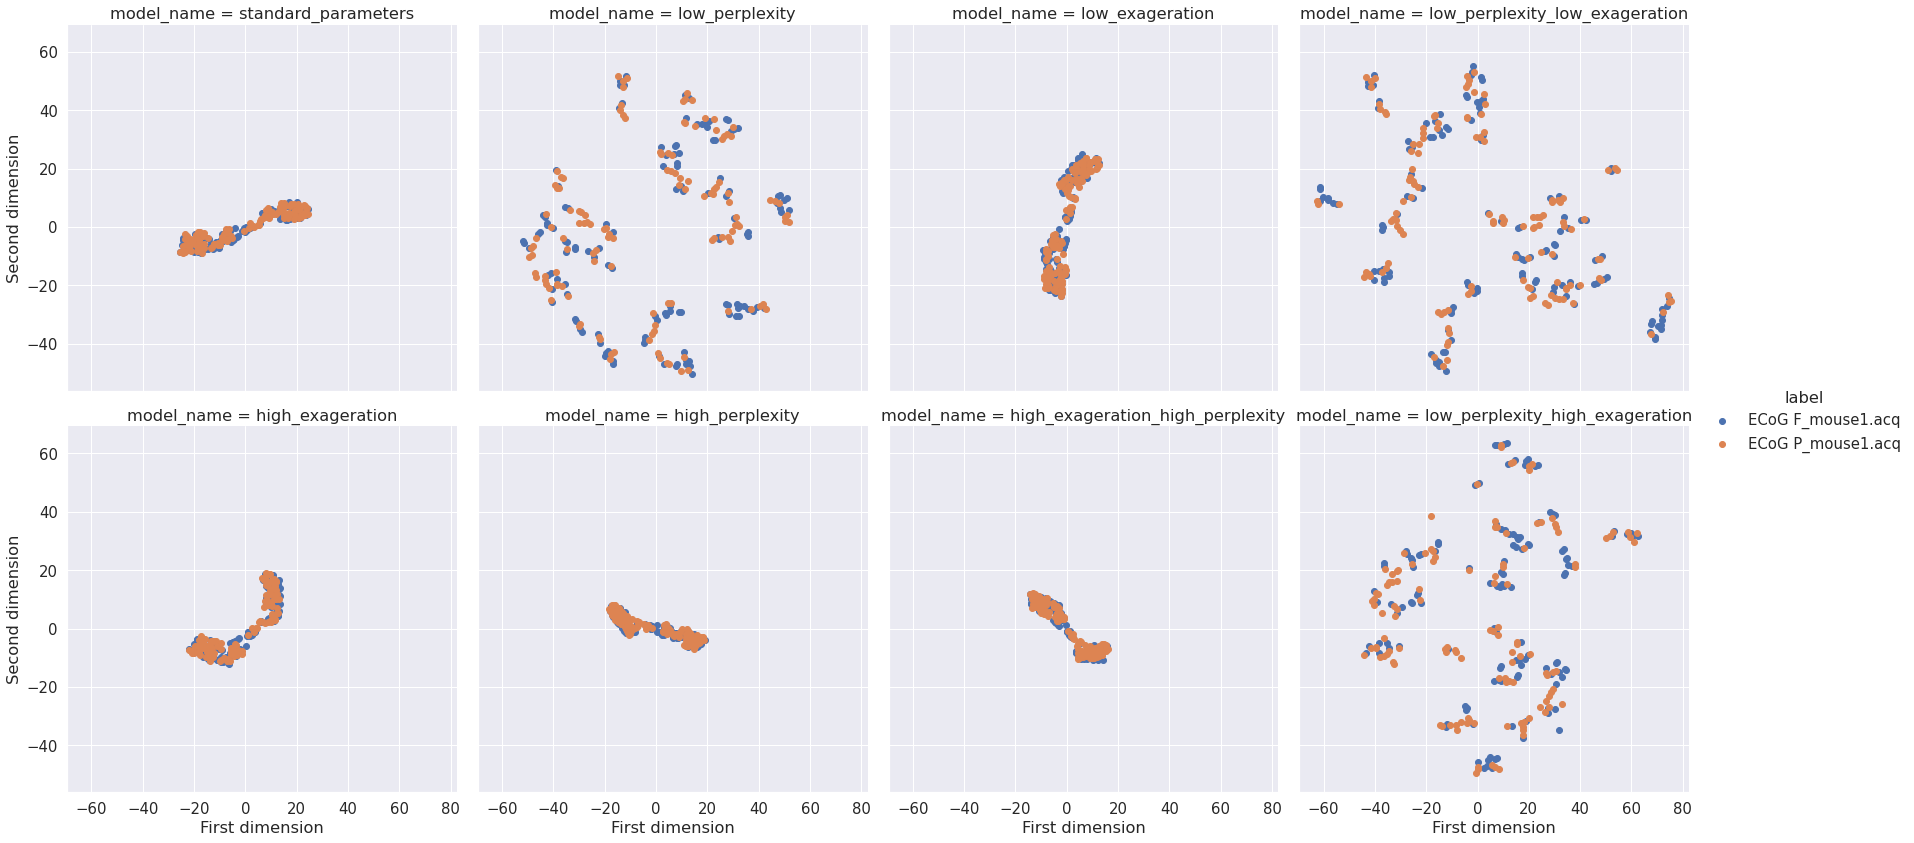

In [6]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse1.acq'], eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse1 with respect to Frontal lobe, Parietal lobe and Stimulation

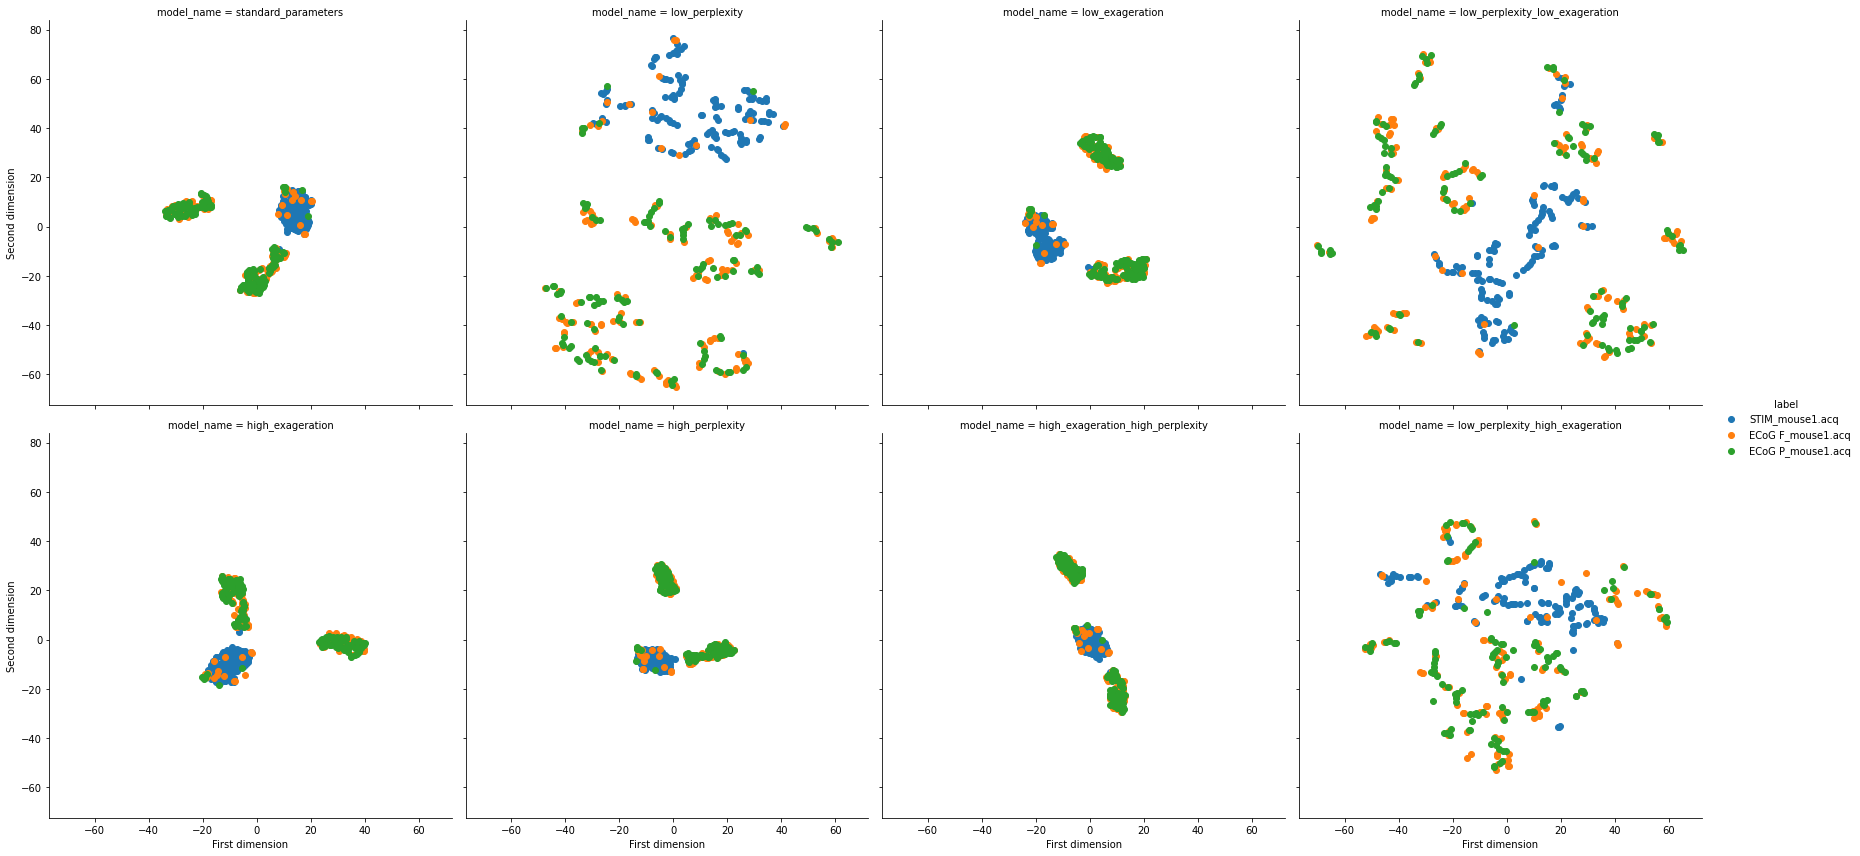

In [9]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse1.acq'], eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### Mouse2

#### Mouse2 with respect to Frontal and Parietal lobes

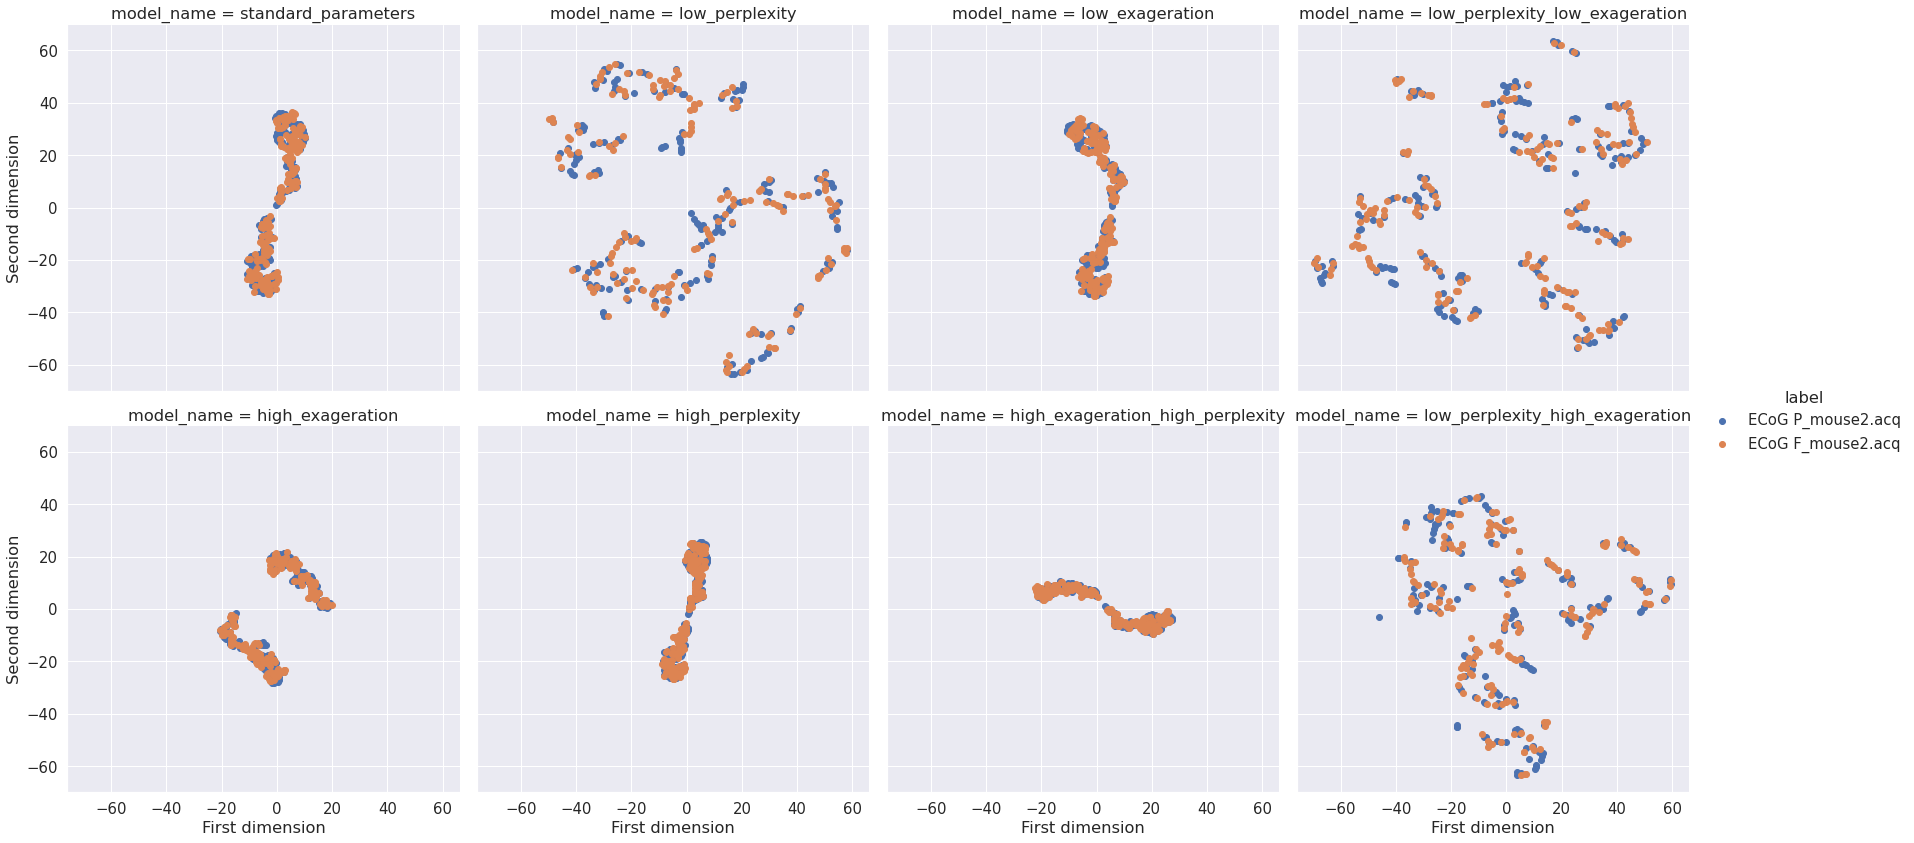

In [2]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse2.acq'], eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse2 with respect to Frontal lobe, Parietal lobe and Stimulation

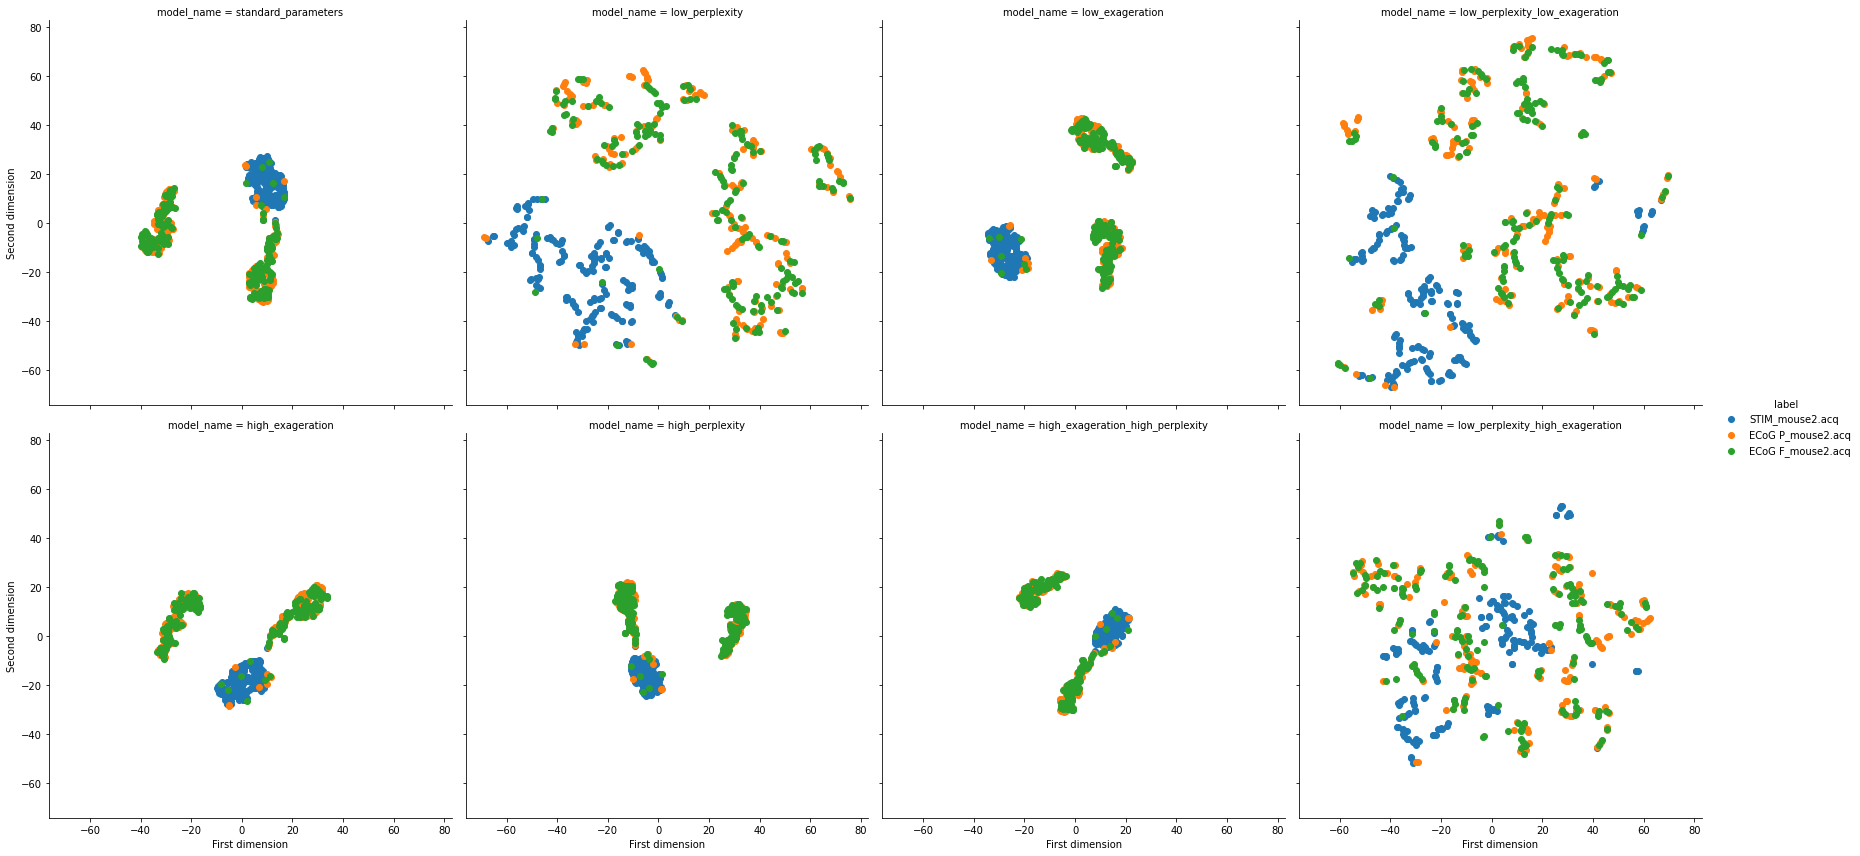

In [11]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse2.acq'], eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse2 with respect to Frontal lobe, Parietal lobe, Stimulation and EKG

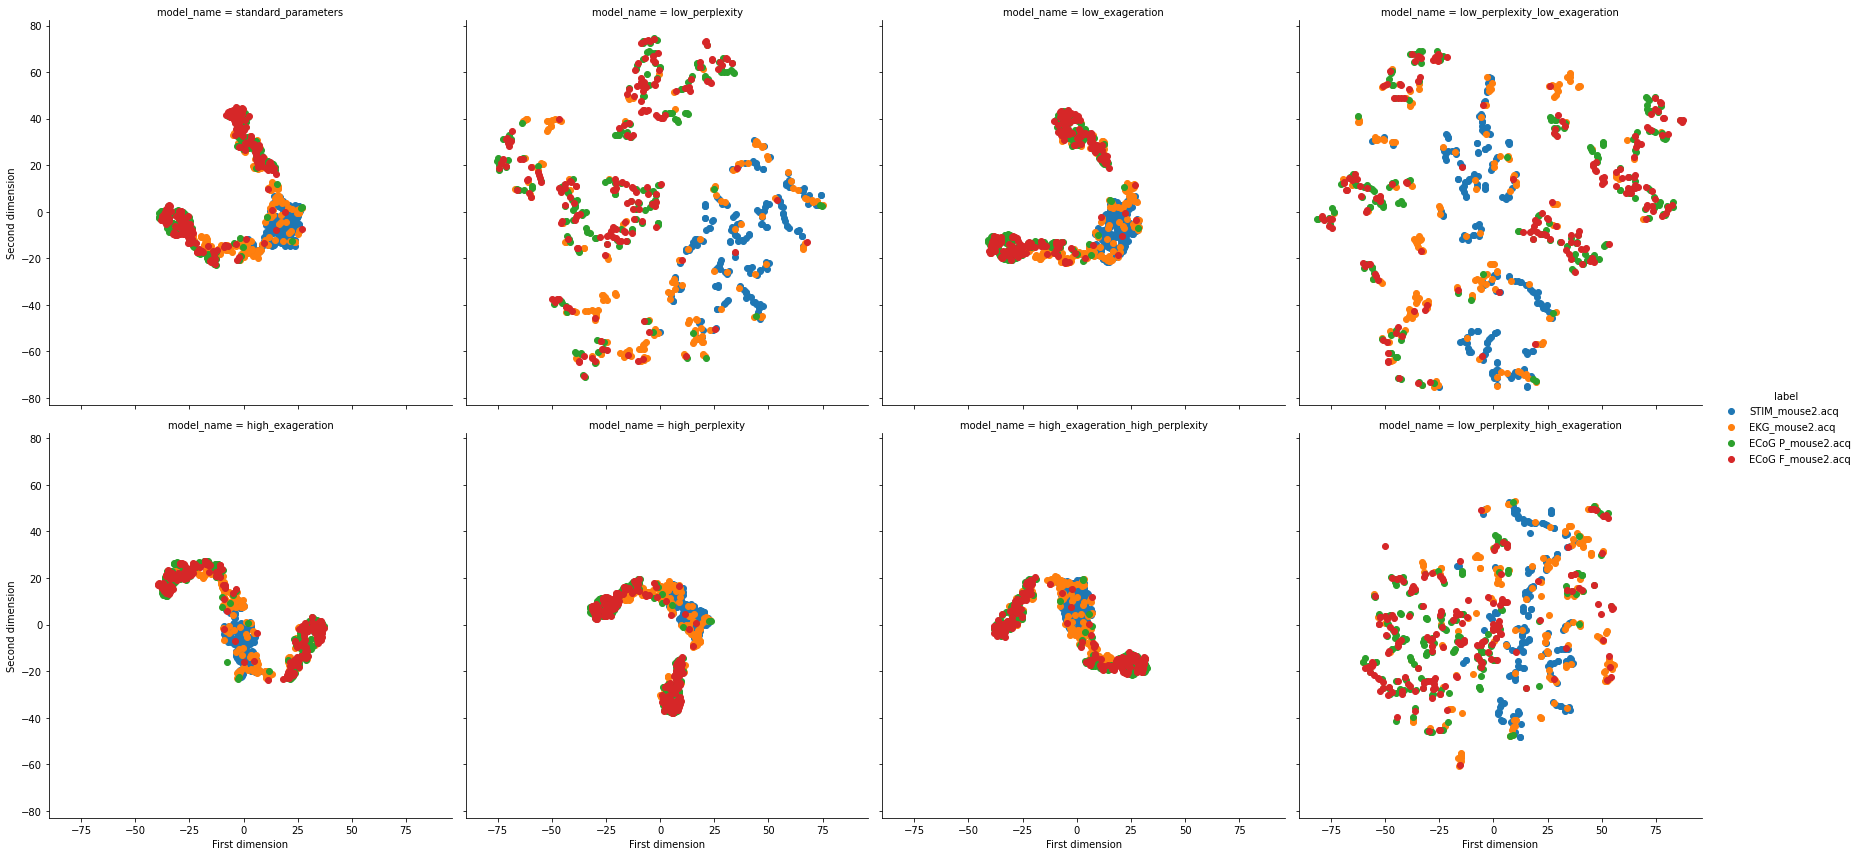

In [12]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse2.acq'], eeg_channels=["ECoG F", "ECoG P", "STIM", "EKG"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### Mouse3

#### Mouse3 with respect to Frontal and Parietal lobes

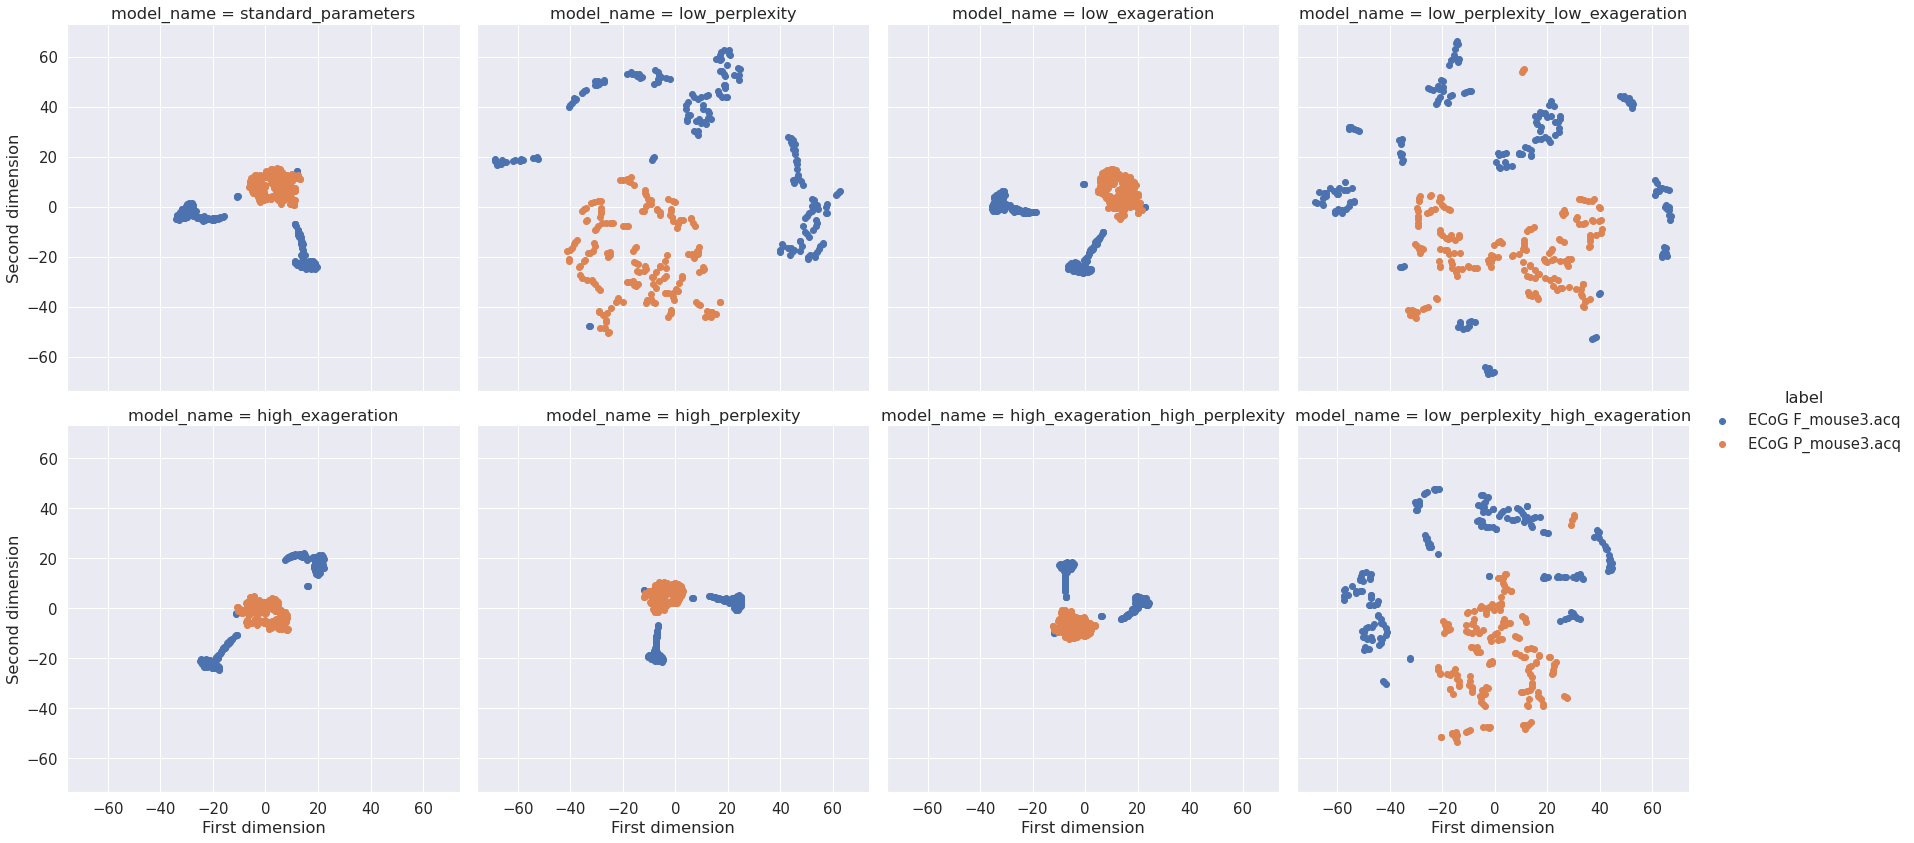

In [3]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse3.acq'], eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse3 with respect to Frontal lobe, Parietal lobe and Stimulation

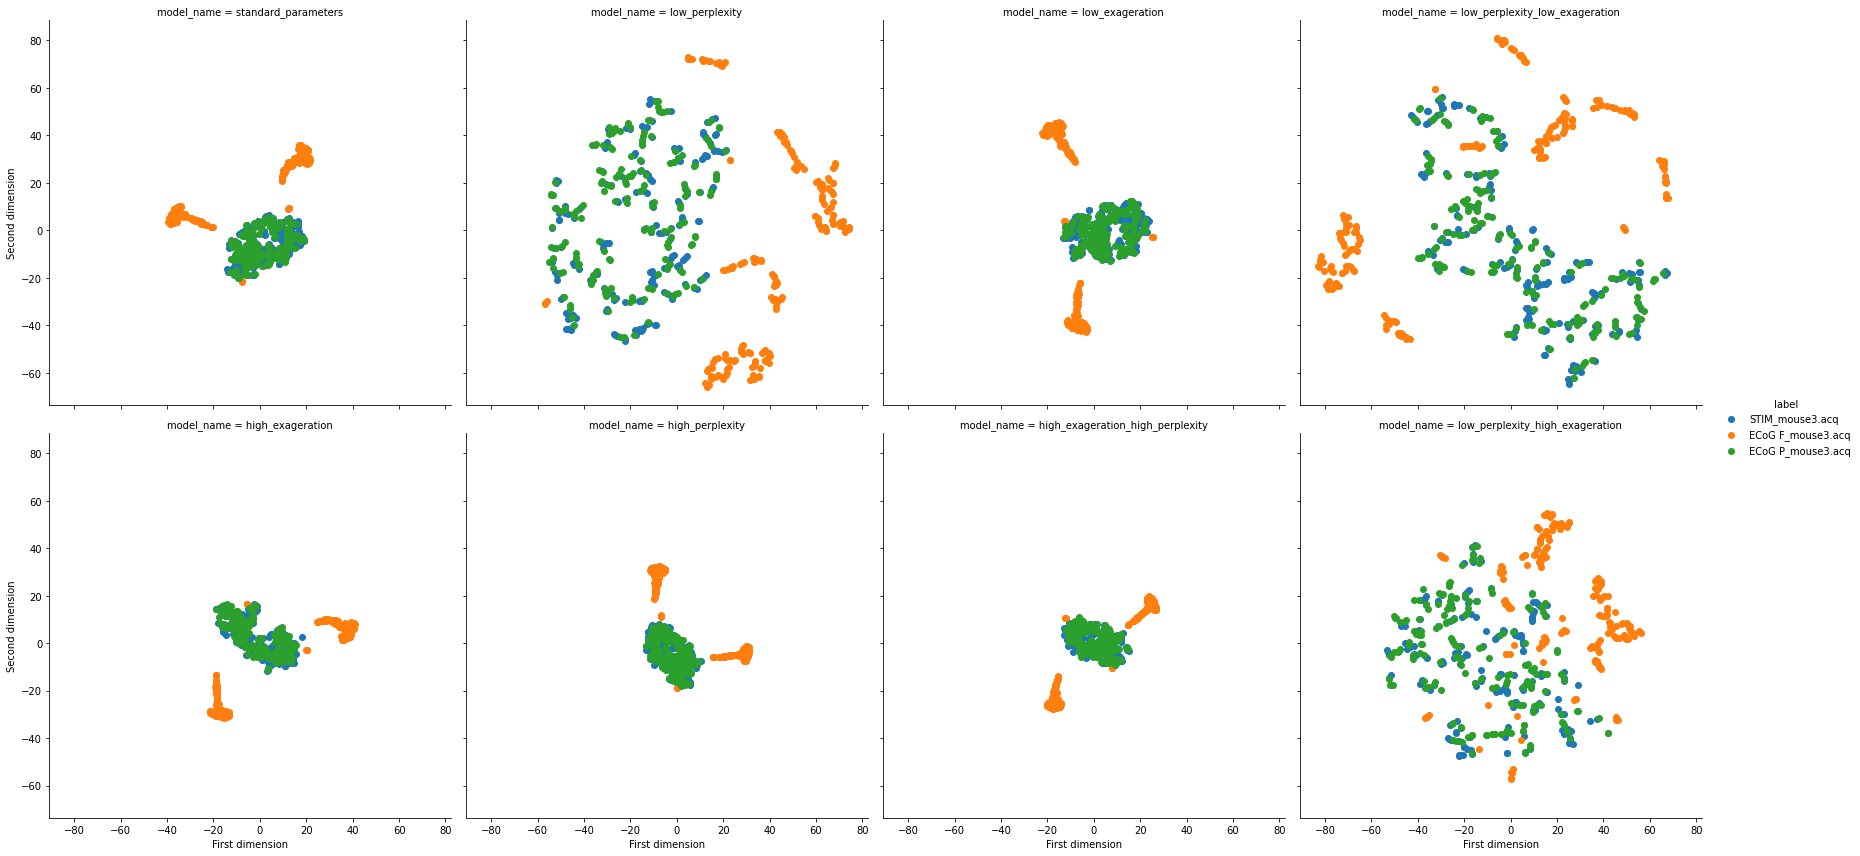

In [14]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse3.acq'], eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### Mouse4

#### Mouse4 with respect to Frontal and Parietal lobes

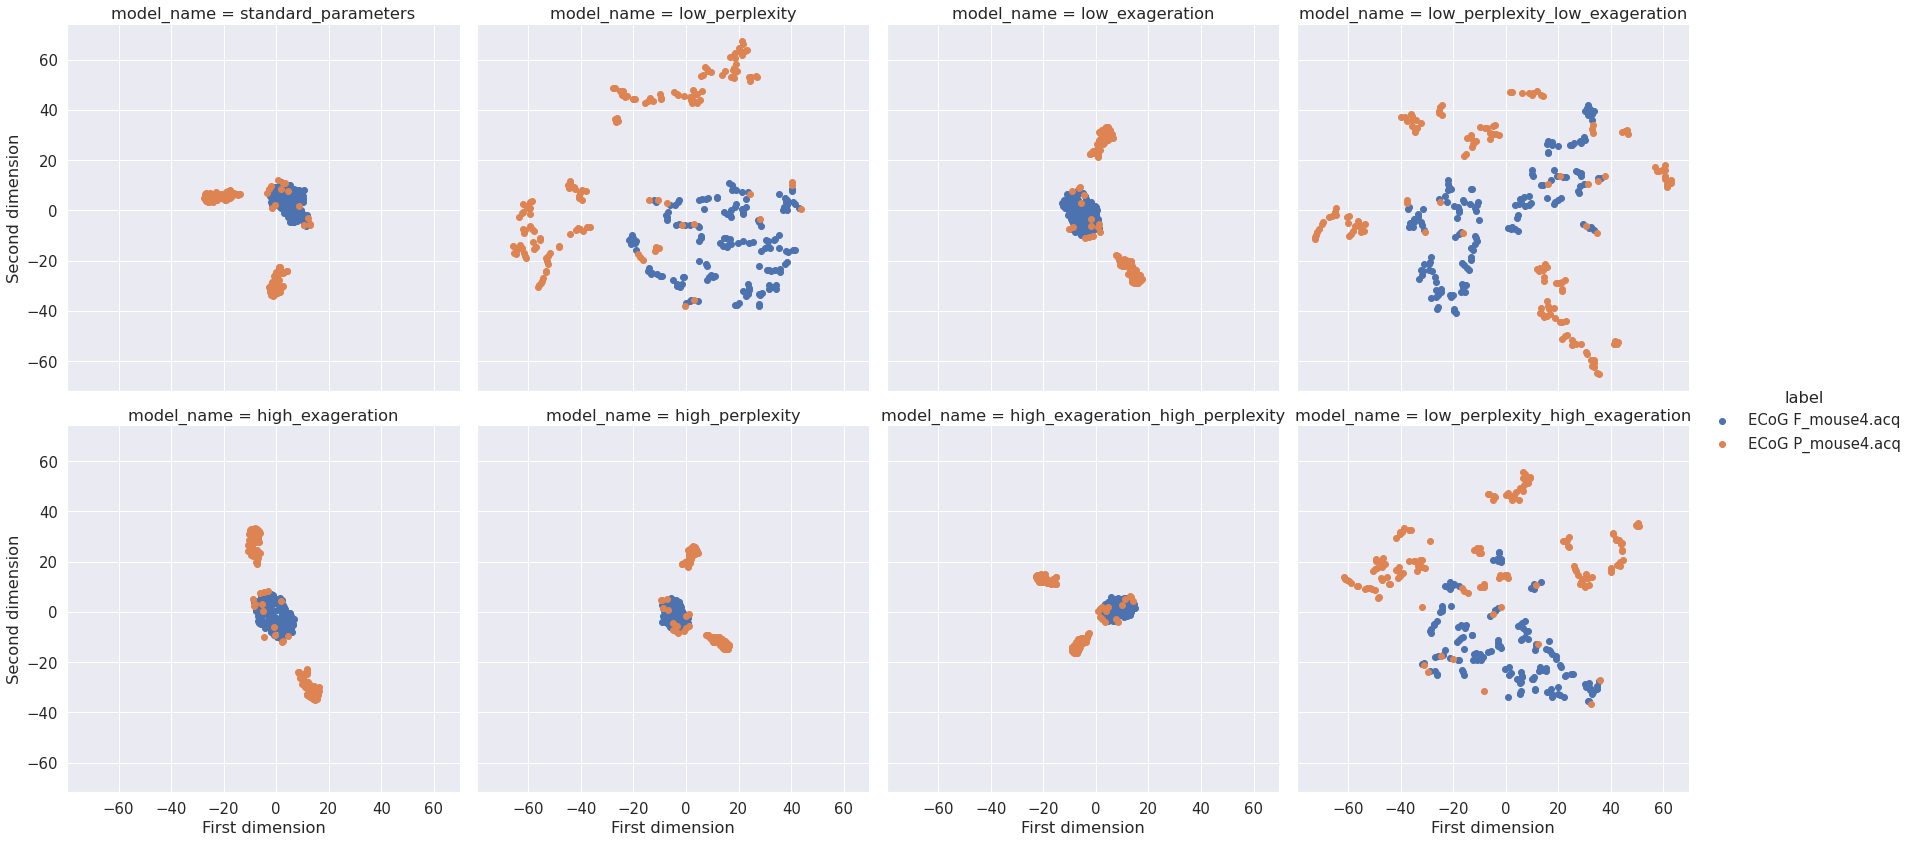

In [4]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse4.acq'], eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse4 with respect to Frontal lobe, Parietal lobe and Stimulation

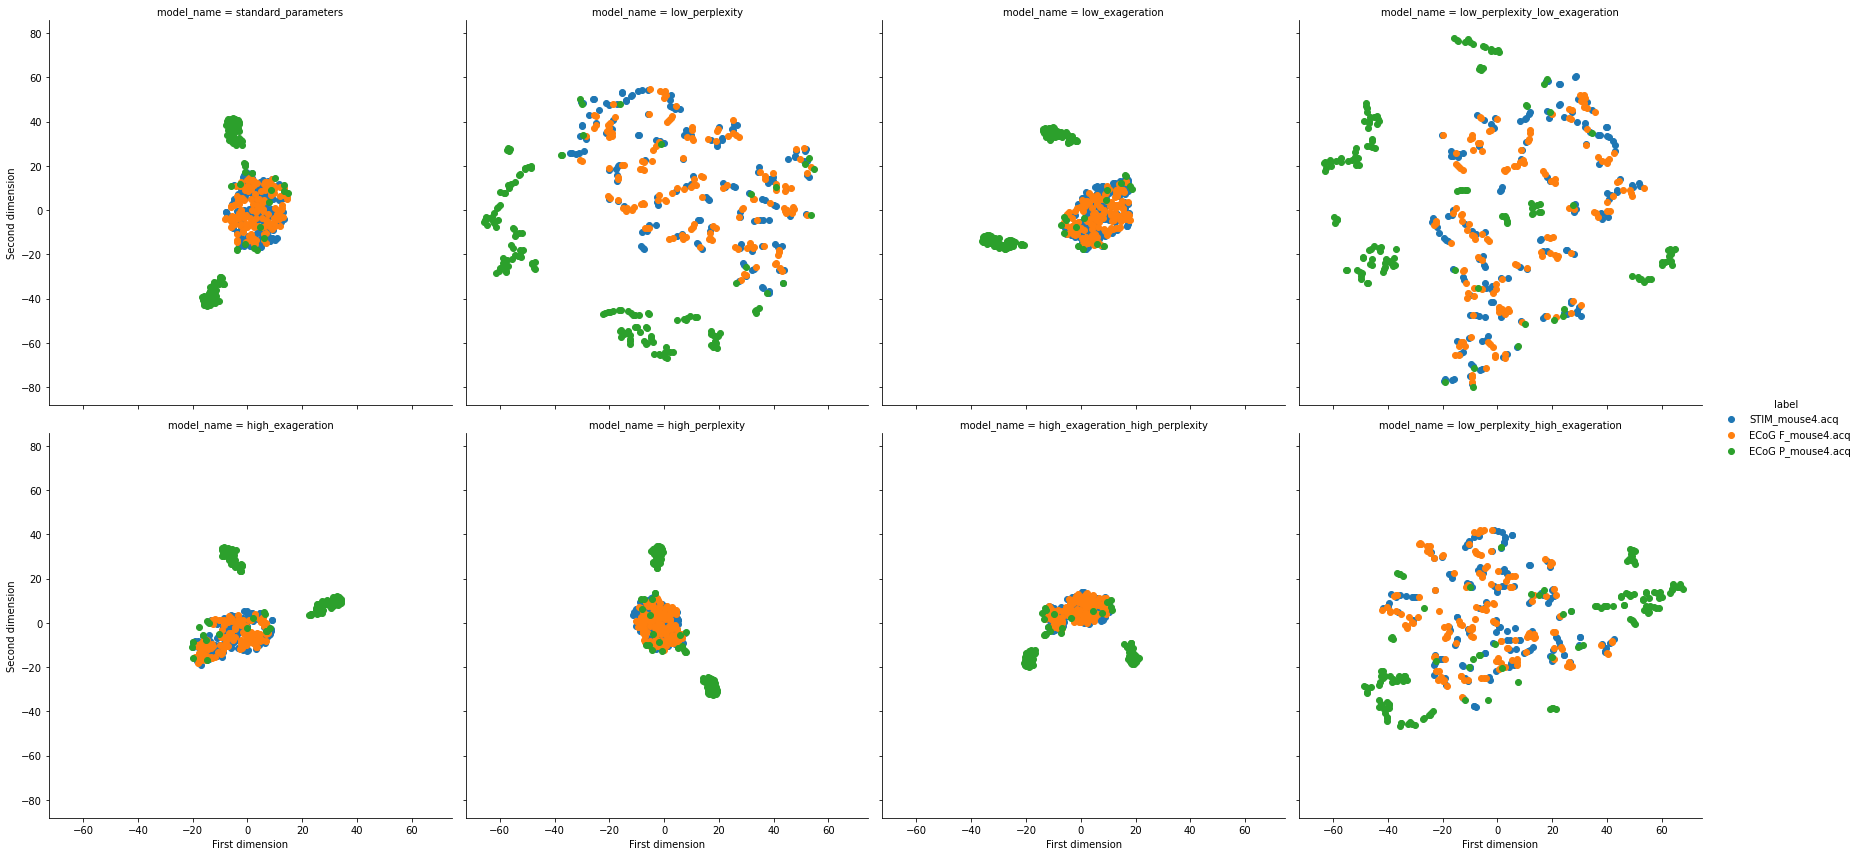

In [16]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse4.acq'], eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse4 with respect to Frontal lobe, Parietal lobe, Stimulation and EKG

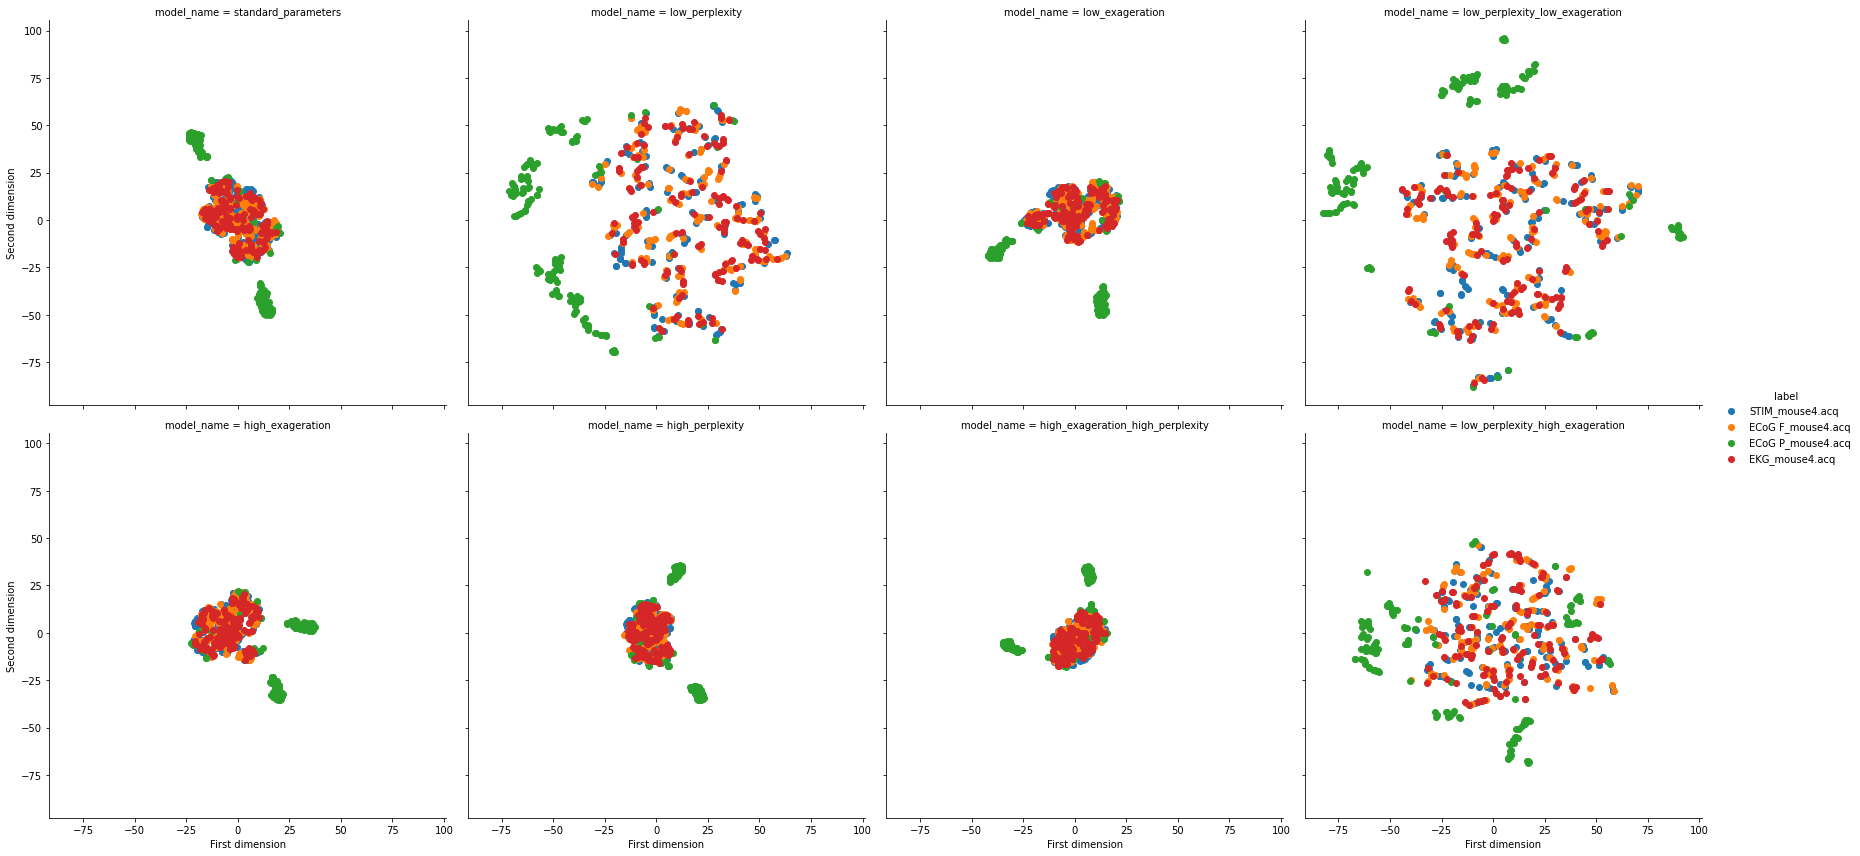

In [17]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=['mouse4.acq'], eeg_channels=["ECoG F", "ECoG P", "STIM", "EKG"])
eeg_visualizer.execute()
eeg_visualizer.plot()

## With respect to channels

### All mice with respect to all acquisitioned channels

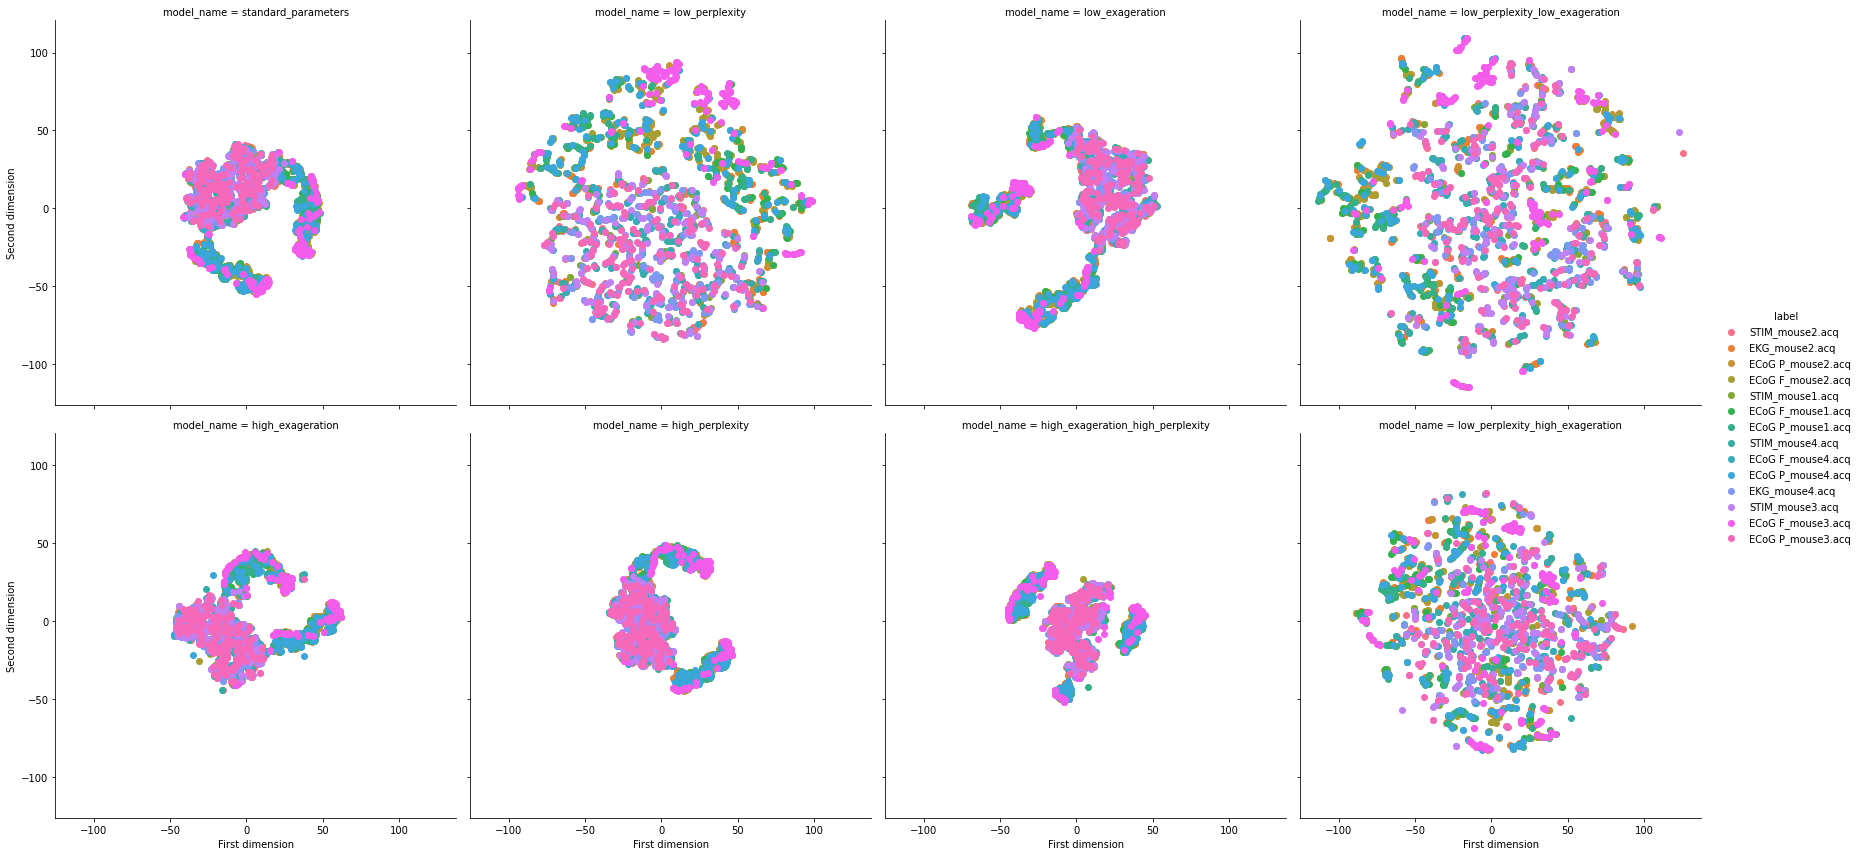

In [18]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(eeg_channels=["ECoG F", "ECoG P", "STIM", "EKG"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### All mice with respect to only the common channels

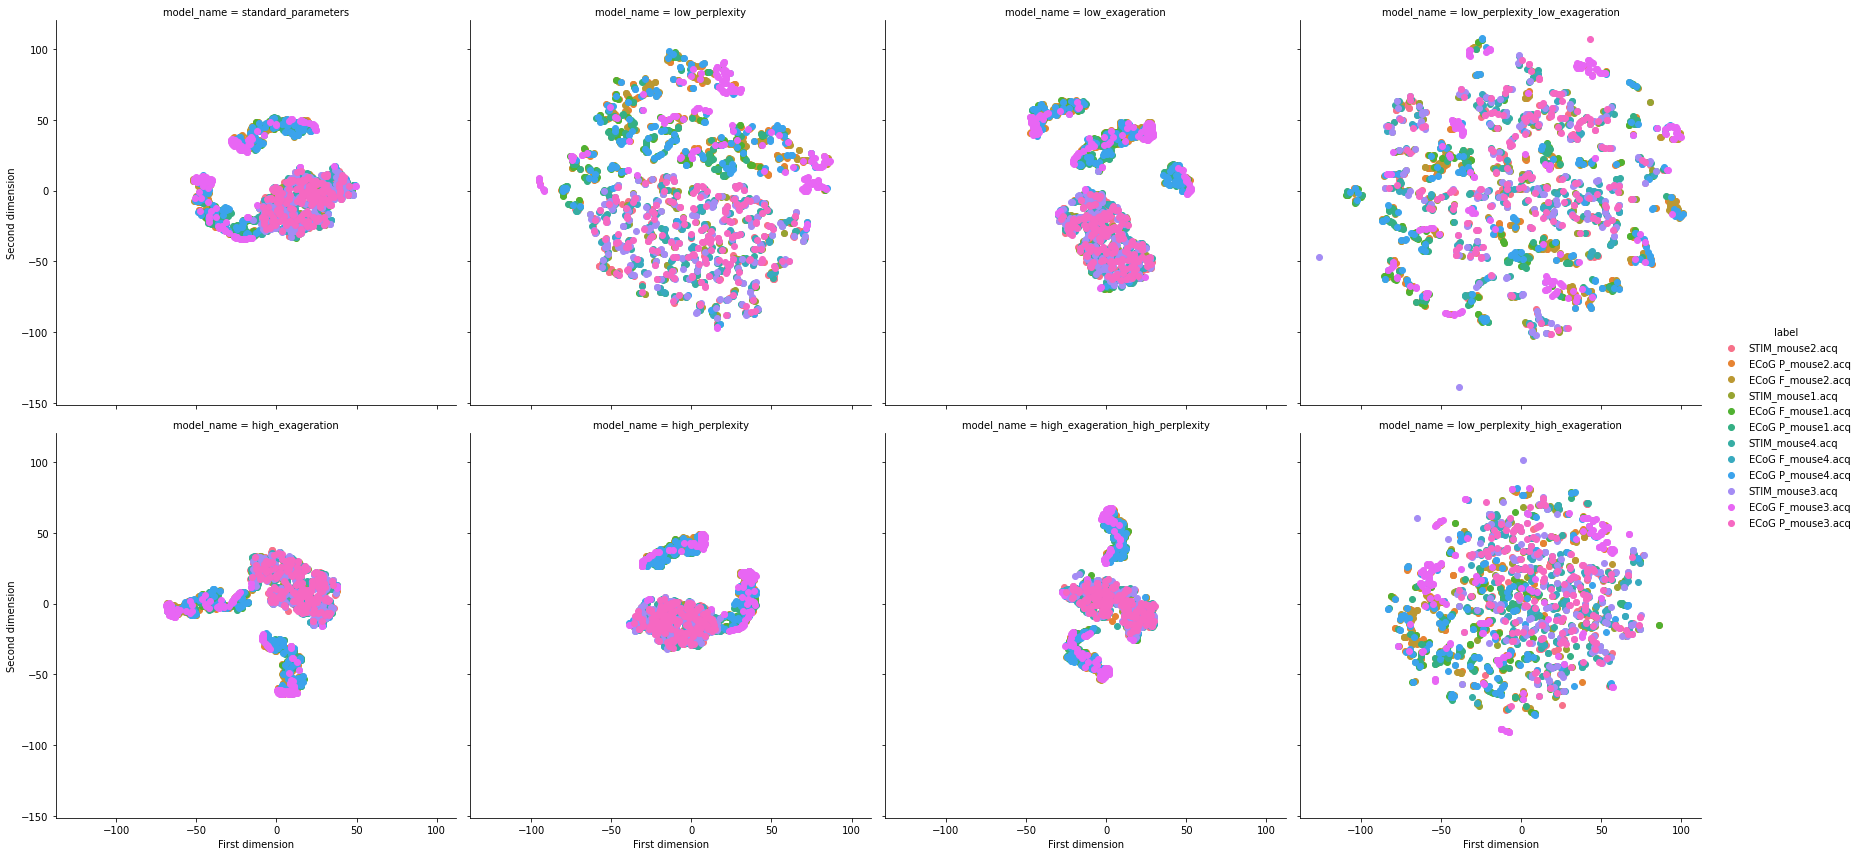

In [19]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### All mice with respect to Frontal and Parietal lobes

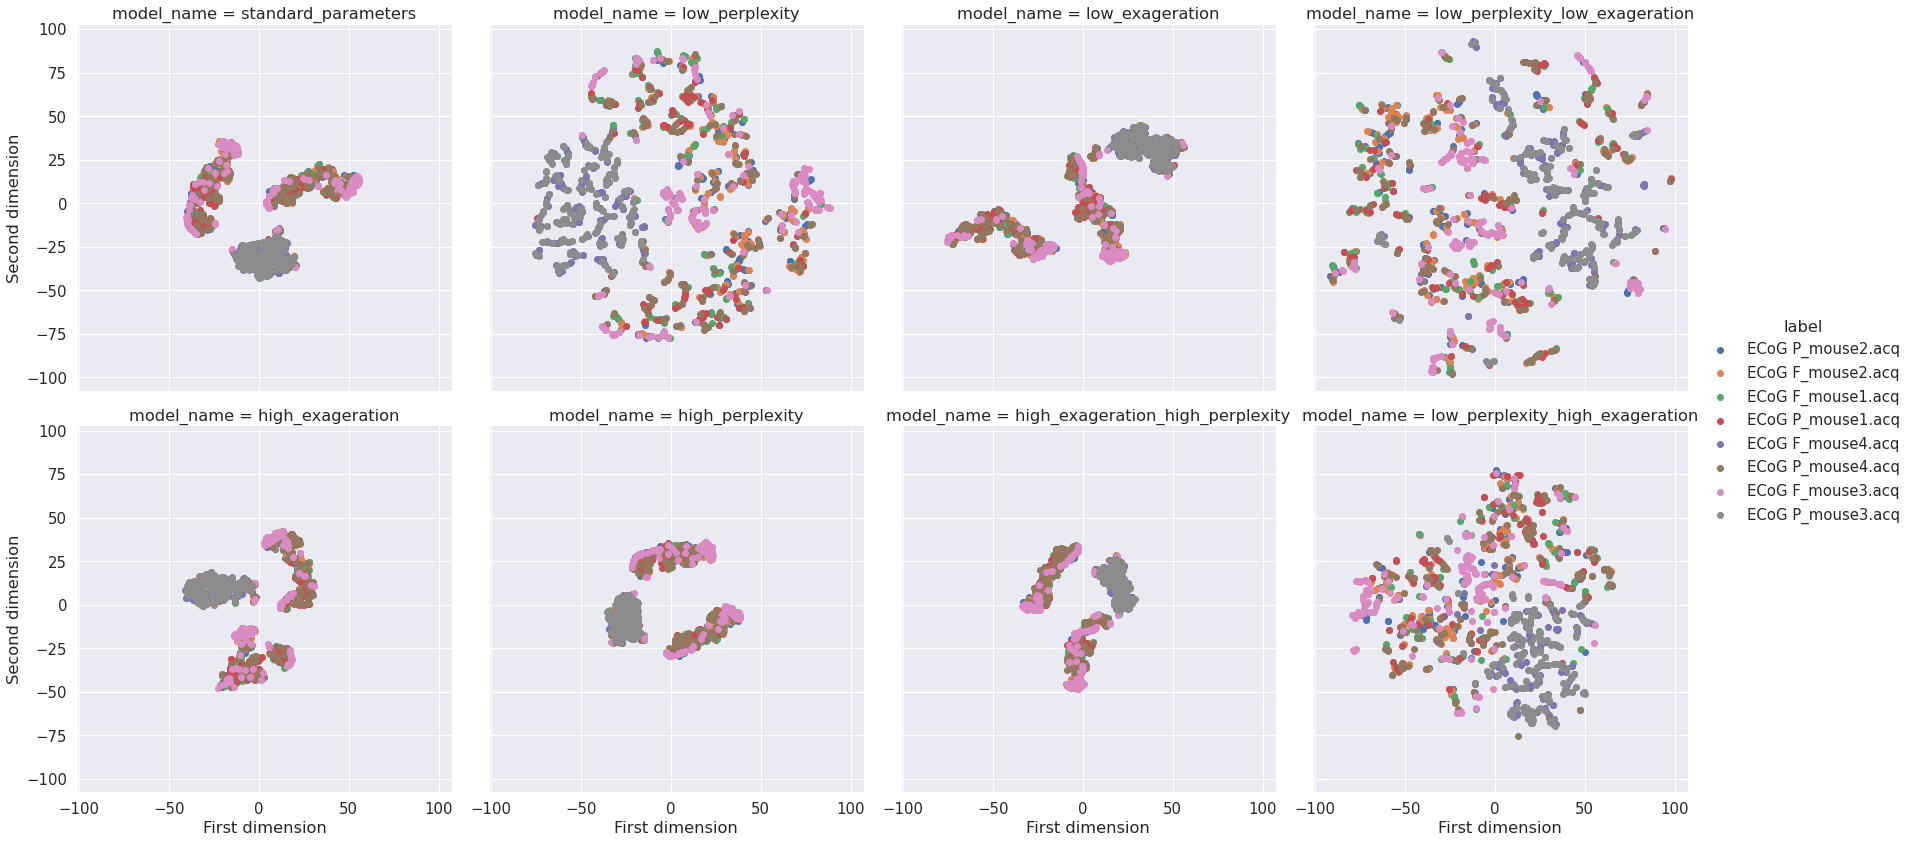

In [5]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### All mice with respect to Frontal lobe

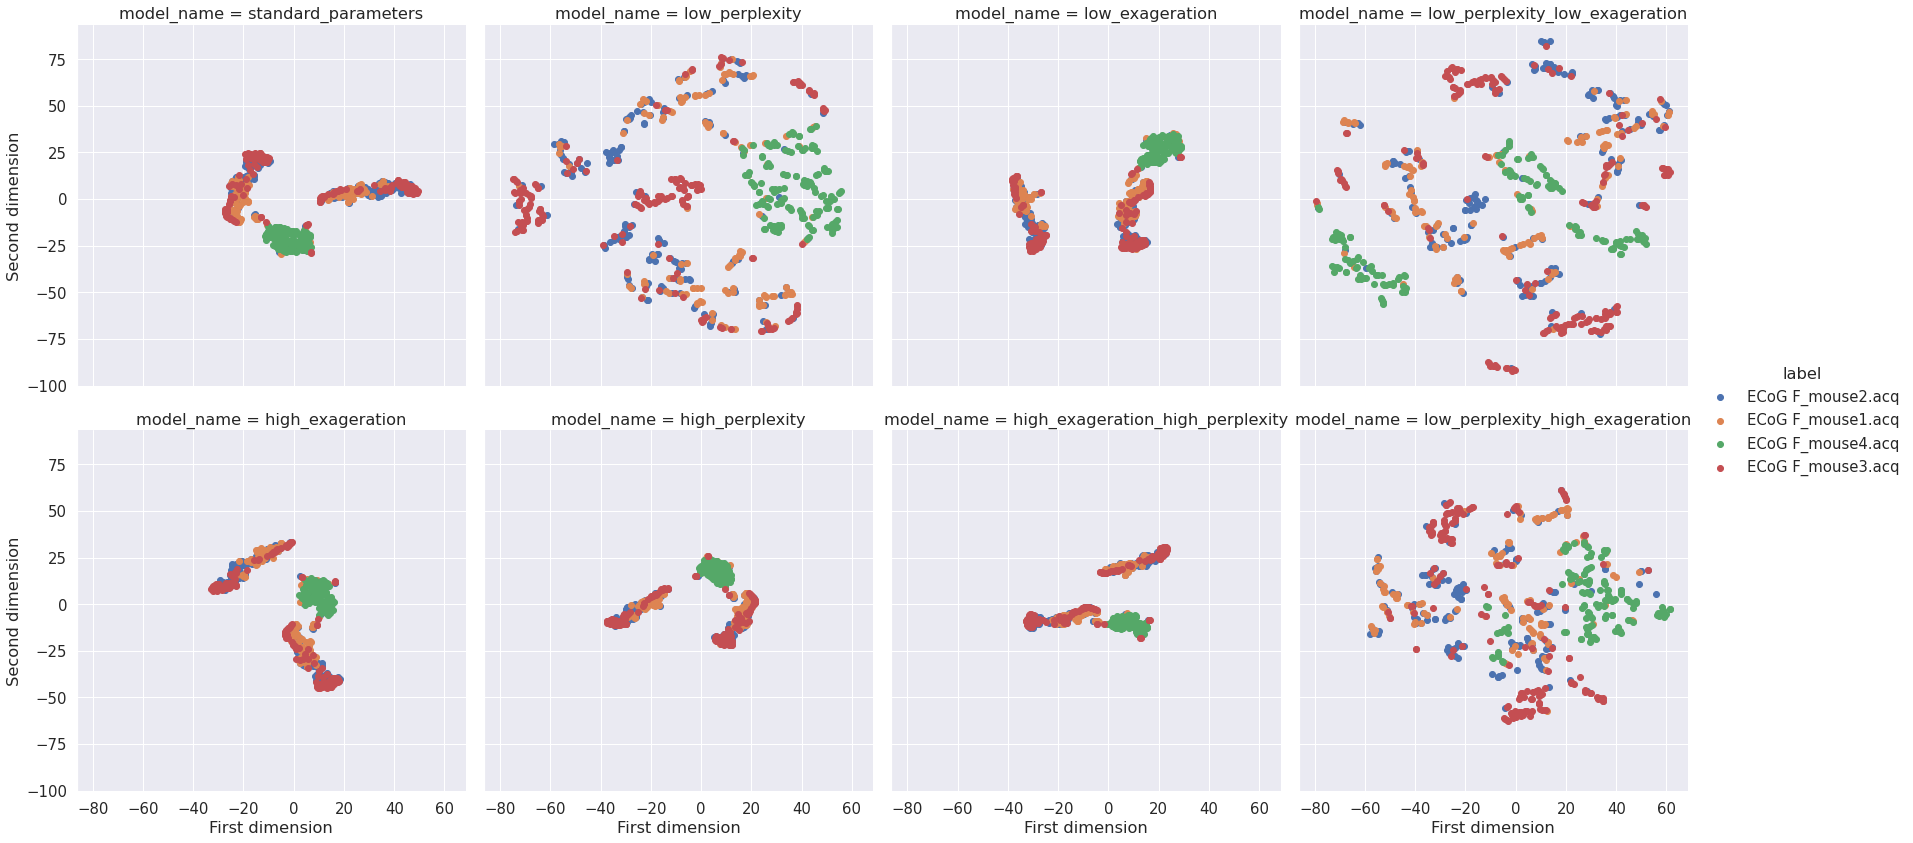

In [6]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(eeg_channels=["ECoG F"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### All mice with respect to Parietal lobe

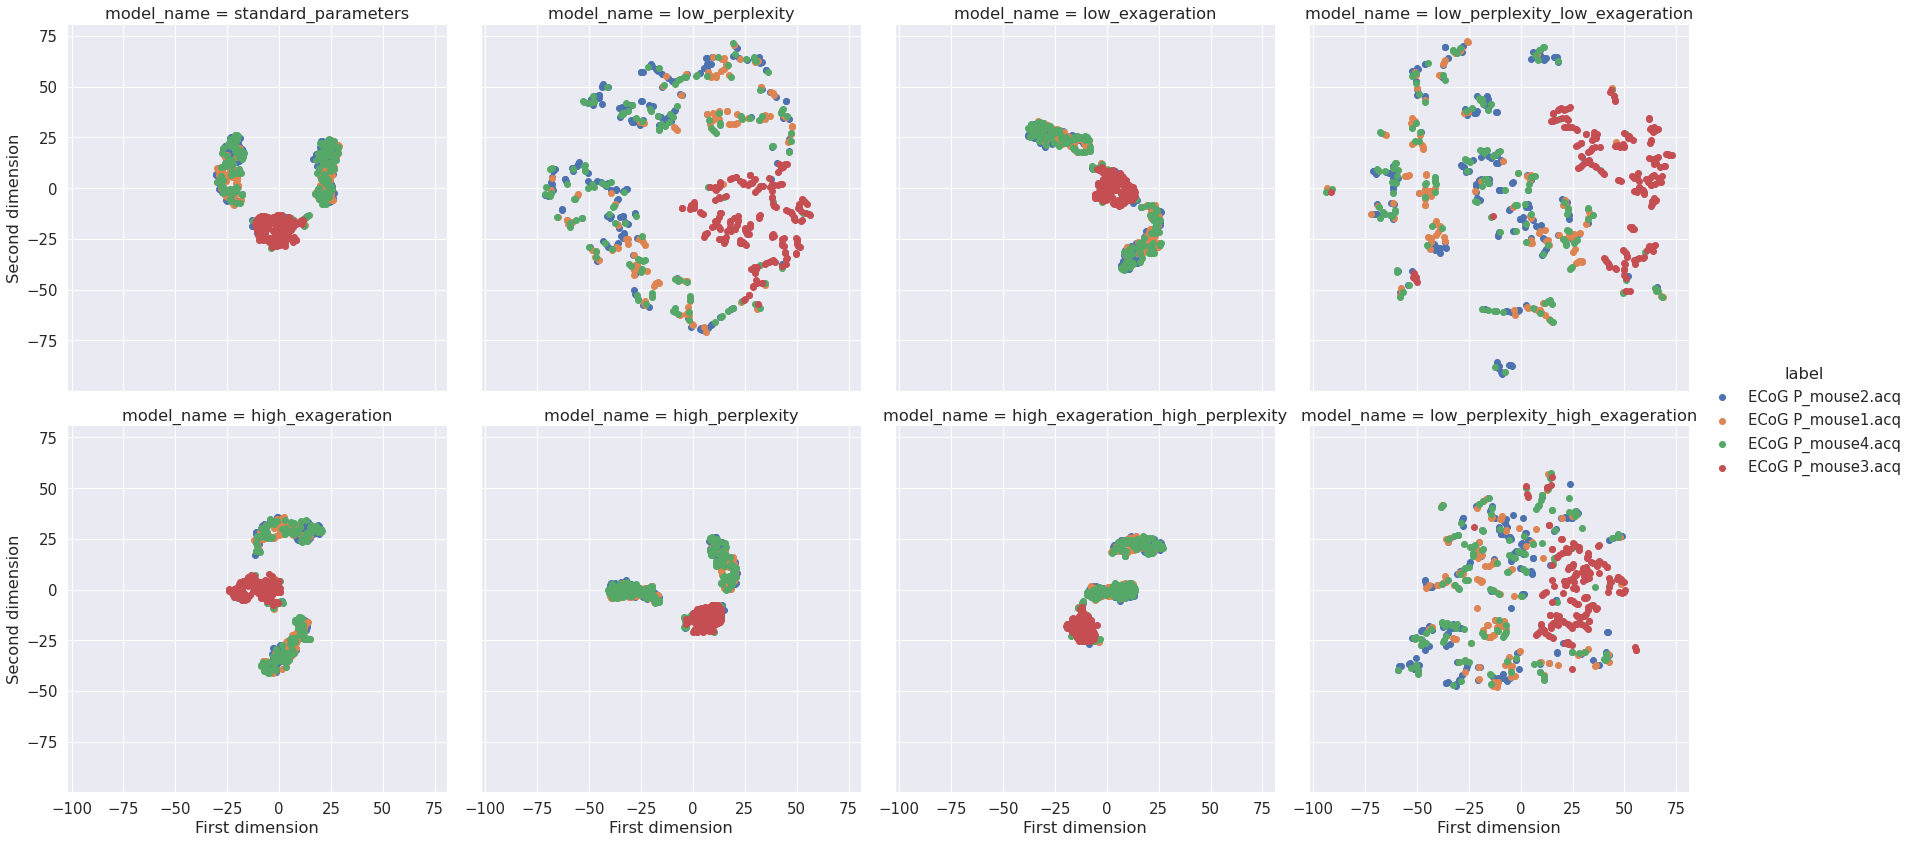

In [7]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(eeg_channels=["ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

## With respect to pairs of Mice

### Pairs of mice with same acqusitioned channels

#### Mouse1 and Mouse4 with respect to all channels

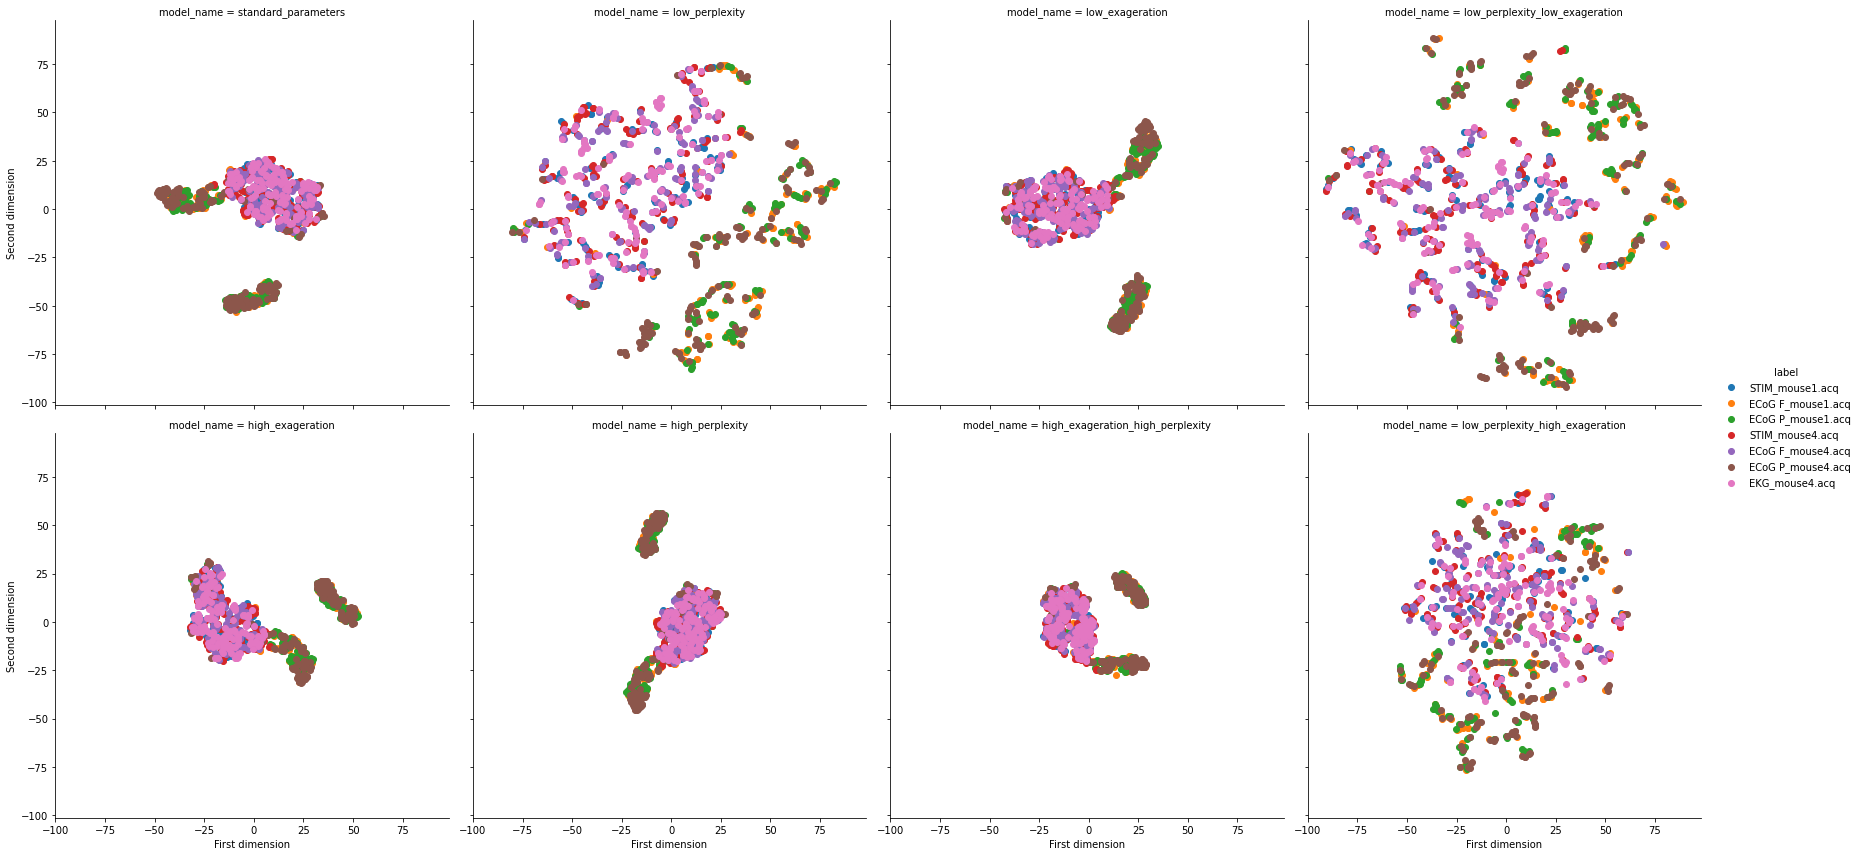

In [23]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse1.acq", "mouse4.acq"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse2 and Mouse3 with respect to all channels

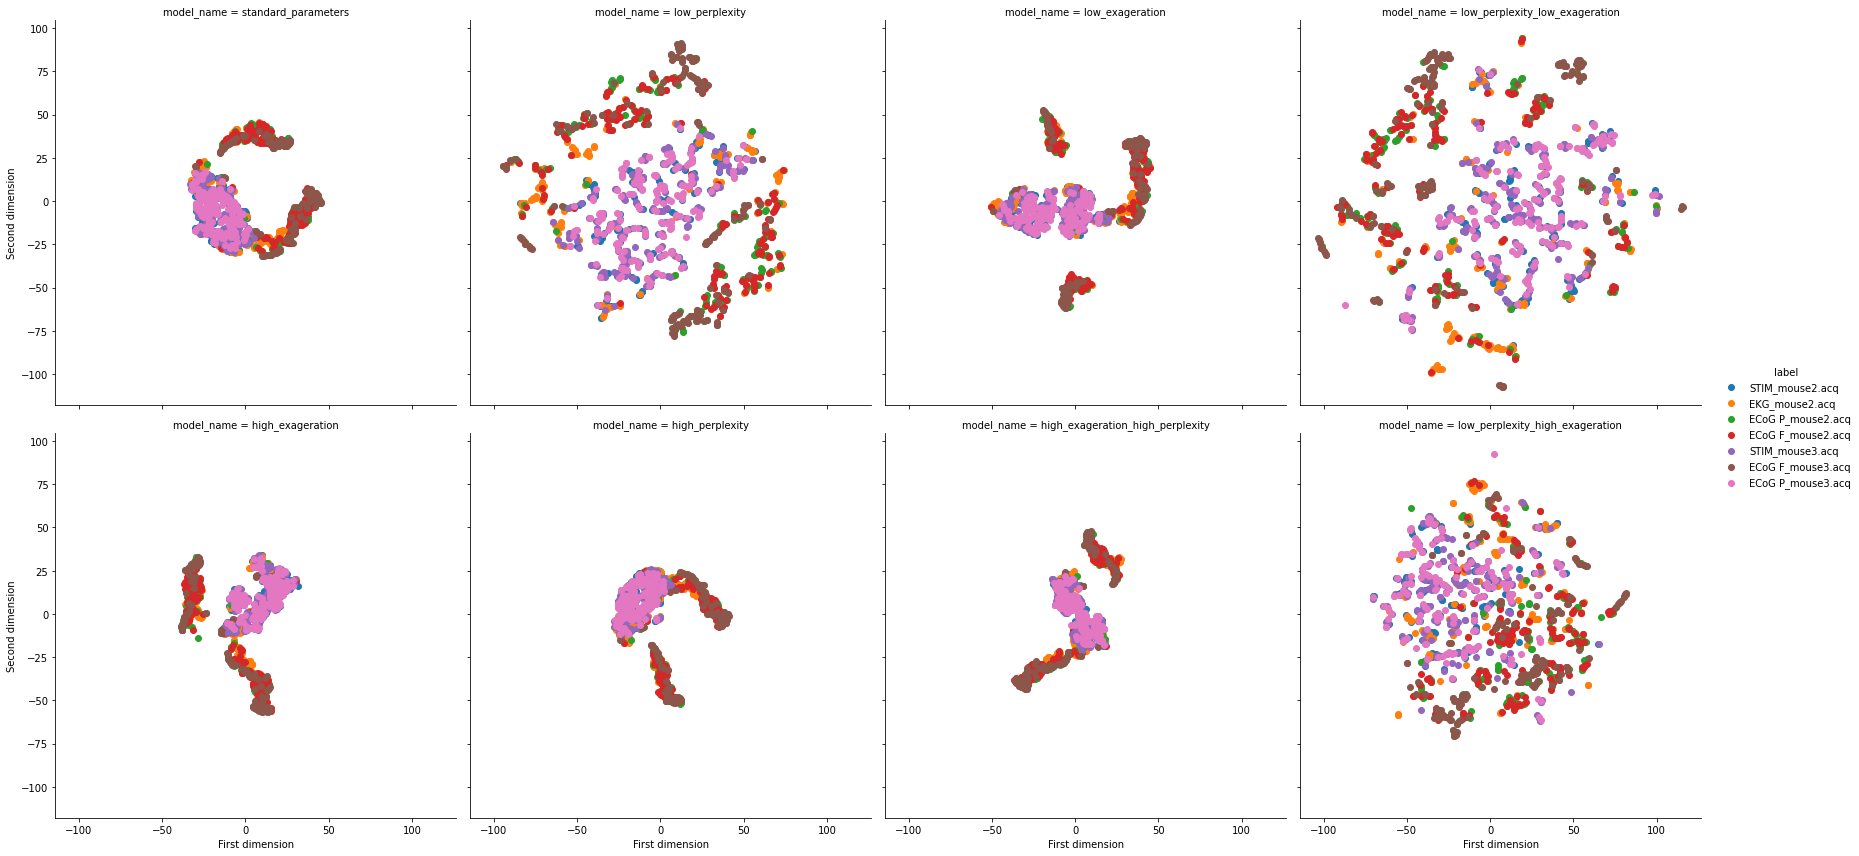

In [24]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse2.acq", "mouse3.acq"])
eeg_visualizer.execute()
eeg_visualizer.plot()

### Possibly related pairs of mice

#### Mouse1 and Mouse3

##### Mouse1 and Mouse3 with respect to common acquisitioned channels

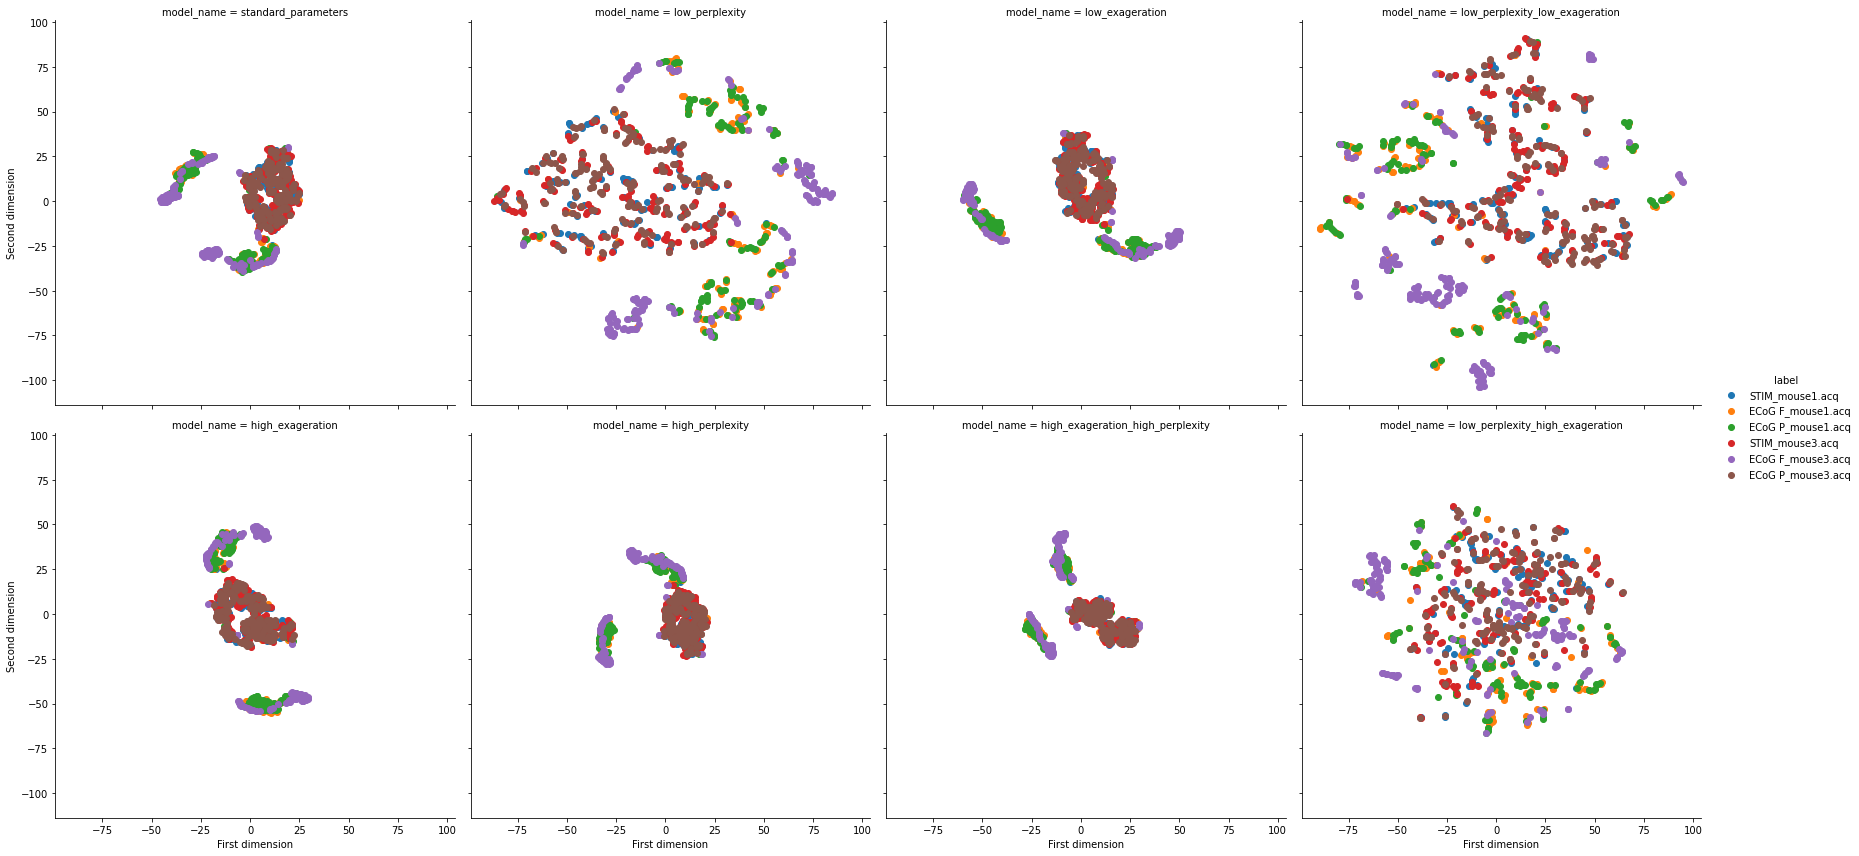

In [25]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse1.acq", "mouse3.acq"], eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

##### Mouse1 and Mouse3 with respect to Frontal and Parietal lobes

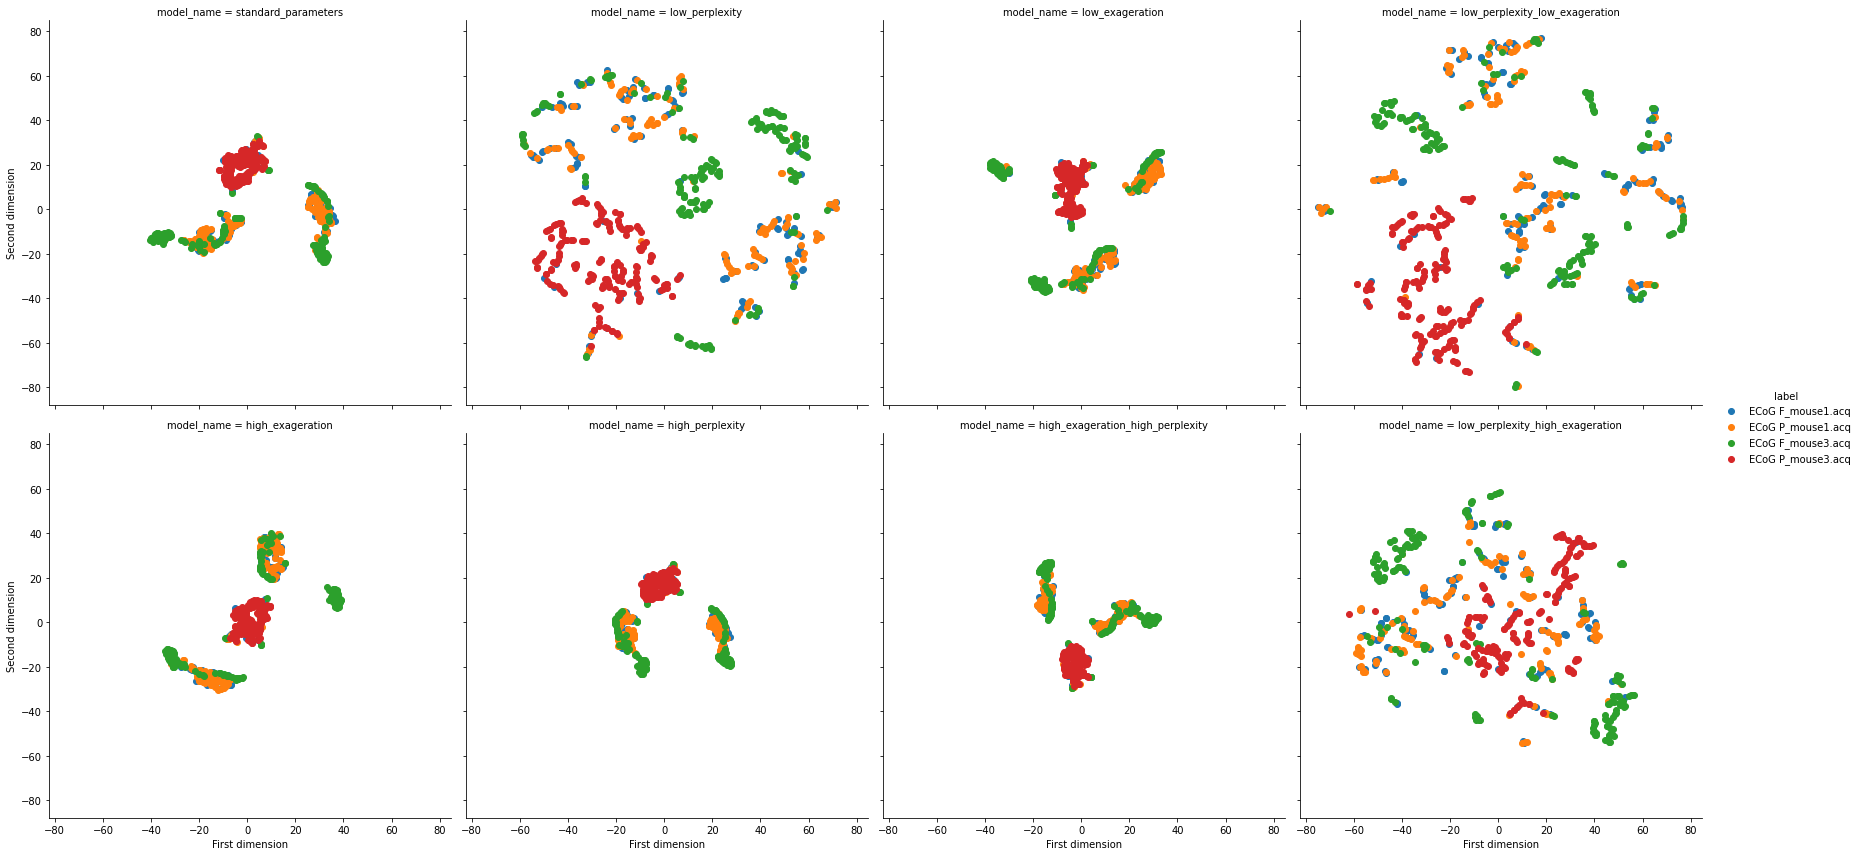

In [26]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse1.acq", "mouse3.acq"], eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

##### Mouse1 and Mouse3 with respect to Frontal lobe

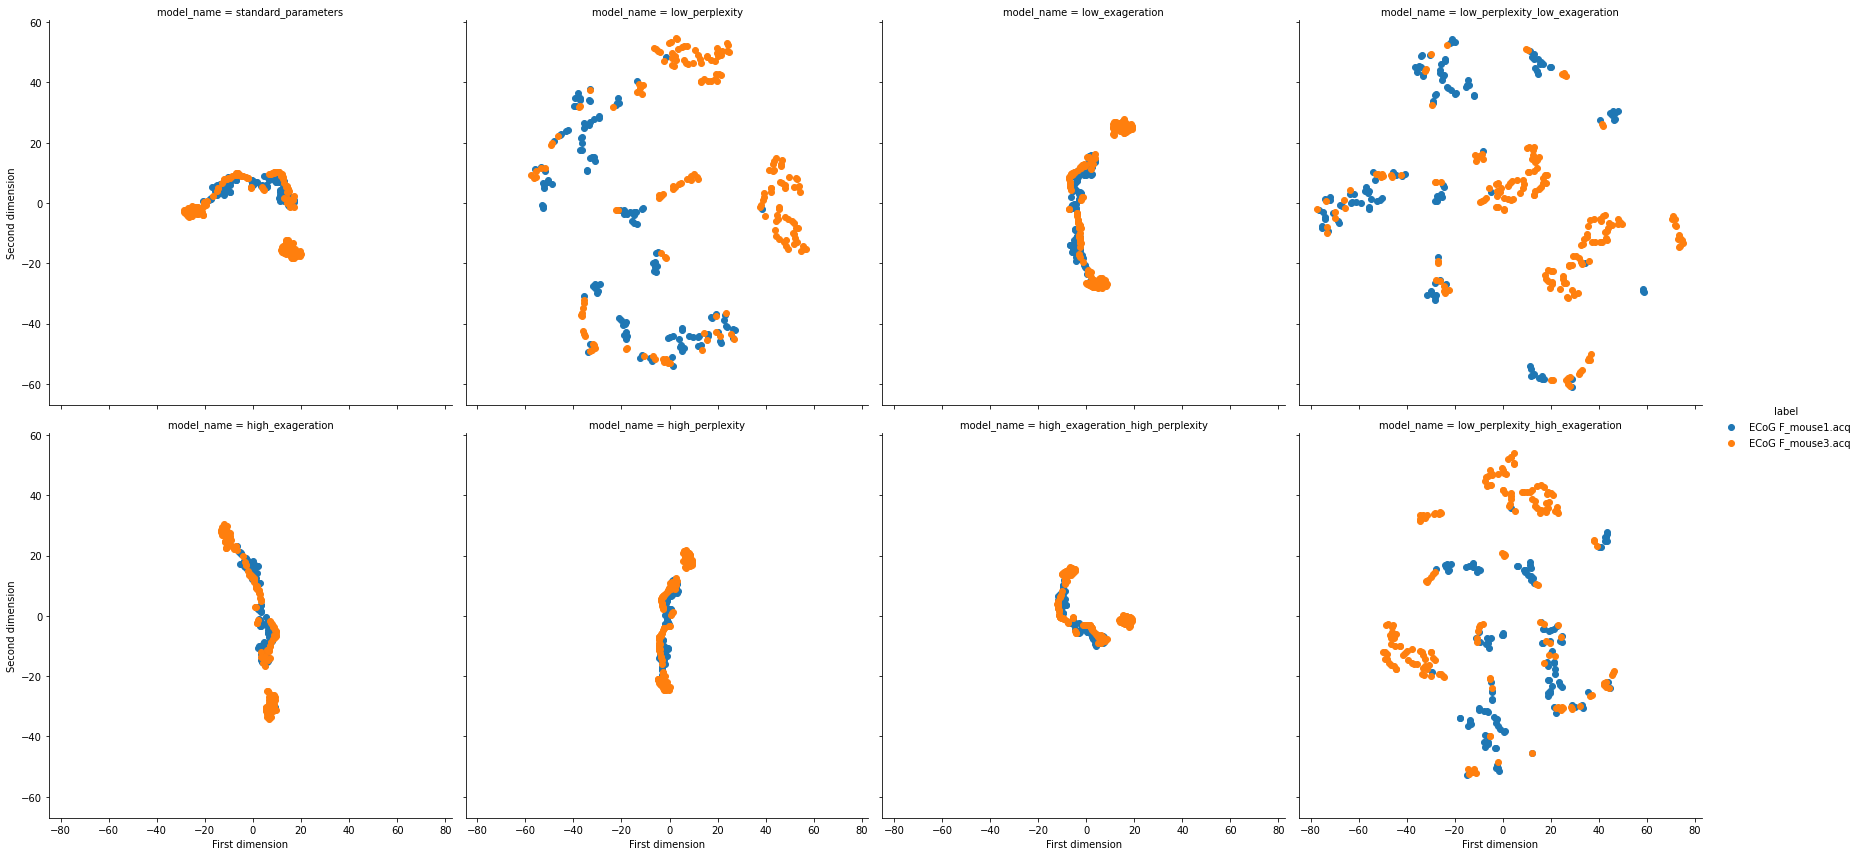

In [27]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse1.acq", "mouse3.acq"], eeg_channels=["ECoG F"])
eeg_visualizer.execute()
eeg_visualizer.plot()

##### Mouse1 and Mouse3 with respect to Parietal lobe

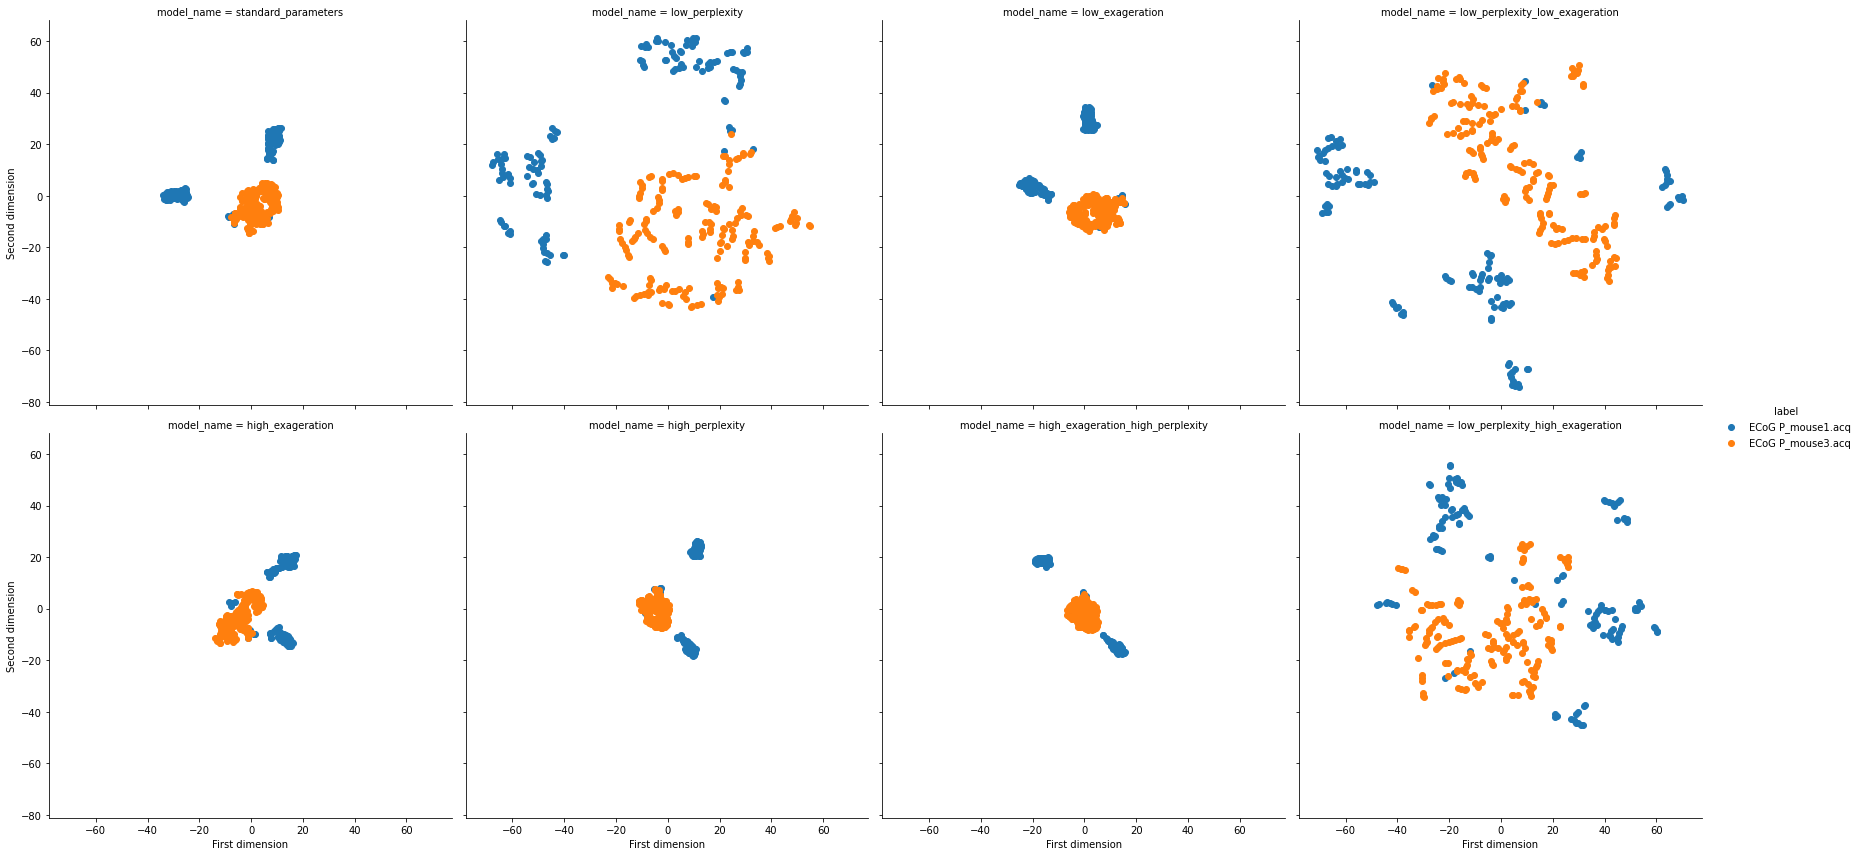

In [28]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse1.acq", "mouse3.acq"], eeg_channels=["ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

#### Mouse2 and Mouse4

##### Mouse2 and Mouse4 with respect to common acquisitioned channels

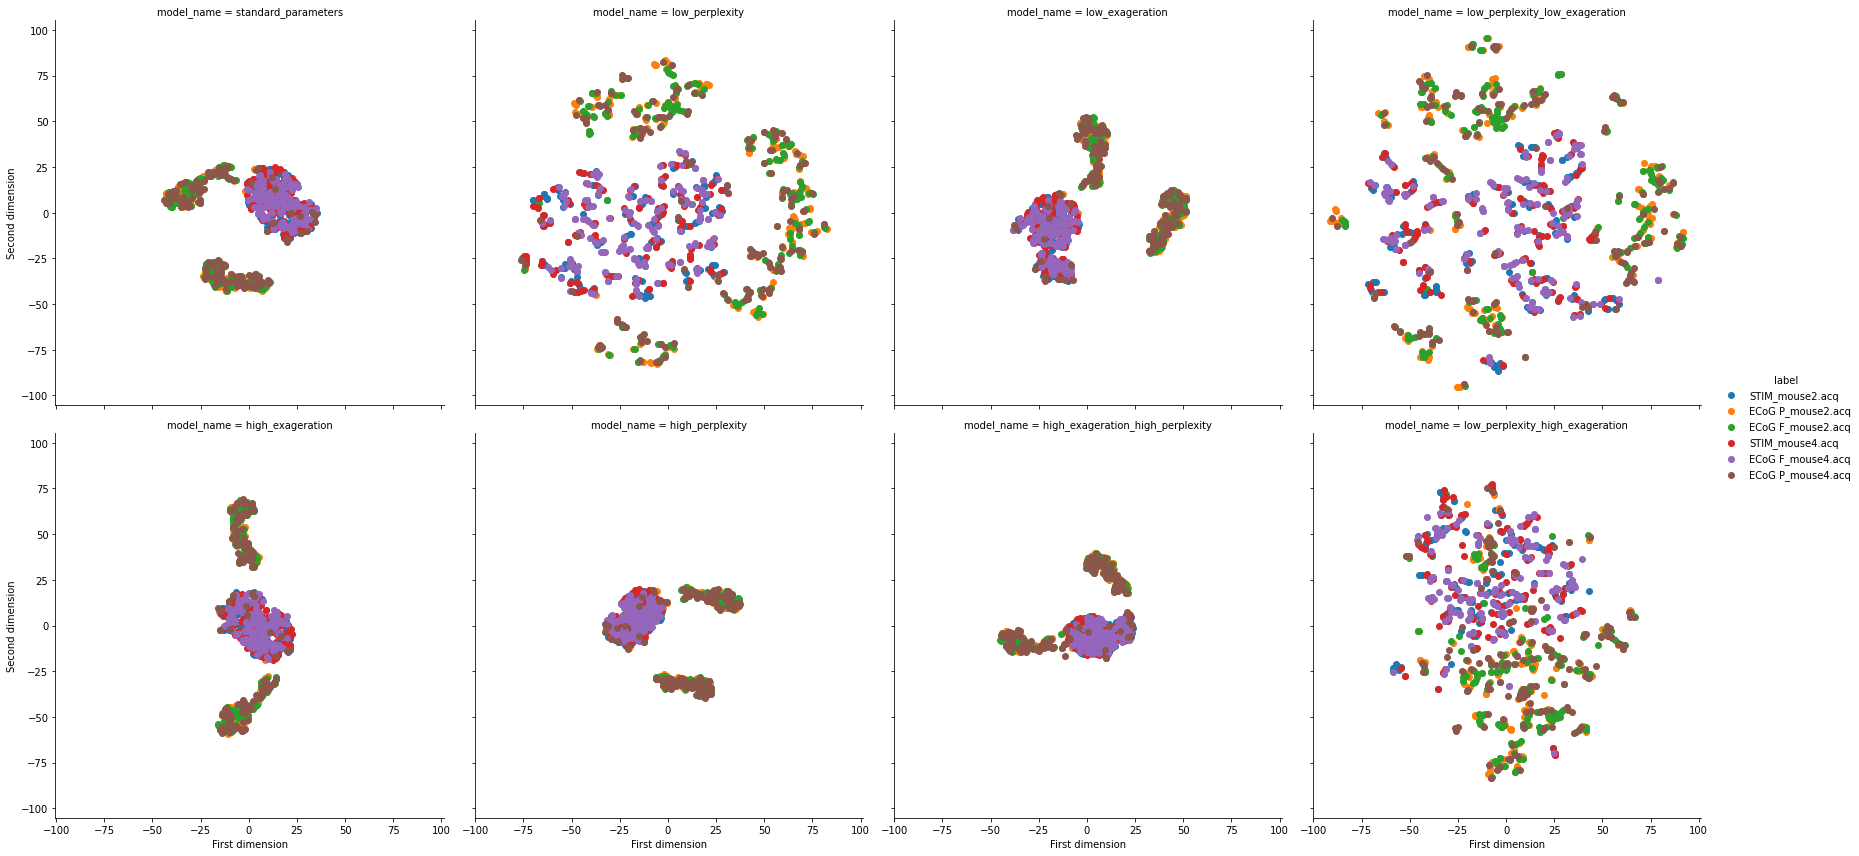

In [29]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse2.acq", "mouse4.acq"], eeg_channels=["ECoG F", "ECoG P", "STIM"])
eeg_visualizer.execute()
eeg_visualizer.plot()

##### Mouse2 and Mouse4 with respect to Frontal and Parietal lobes

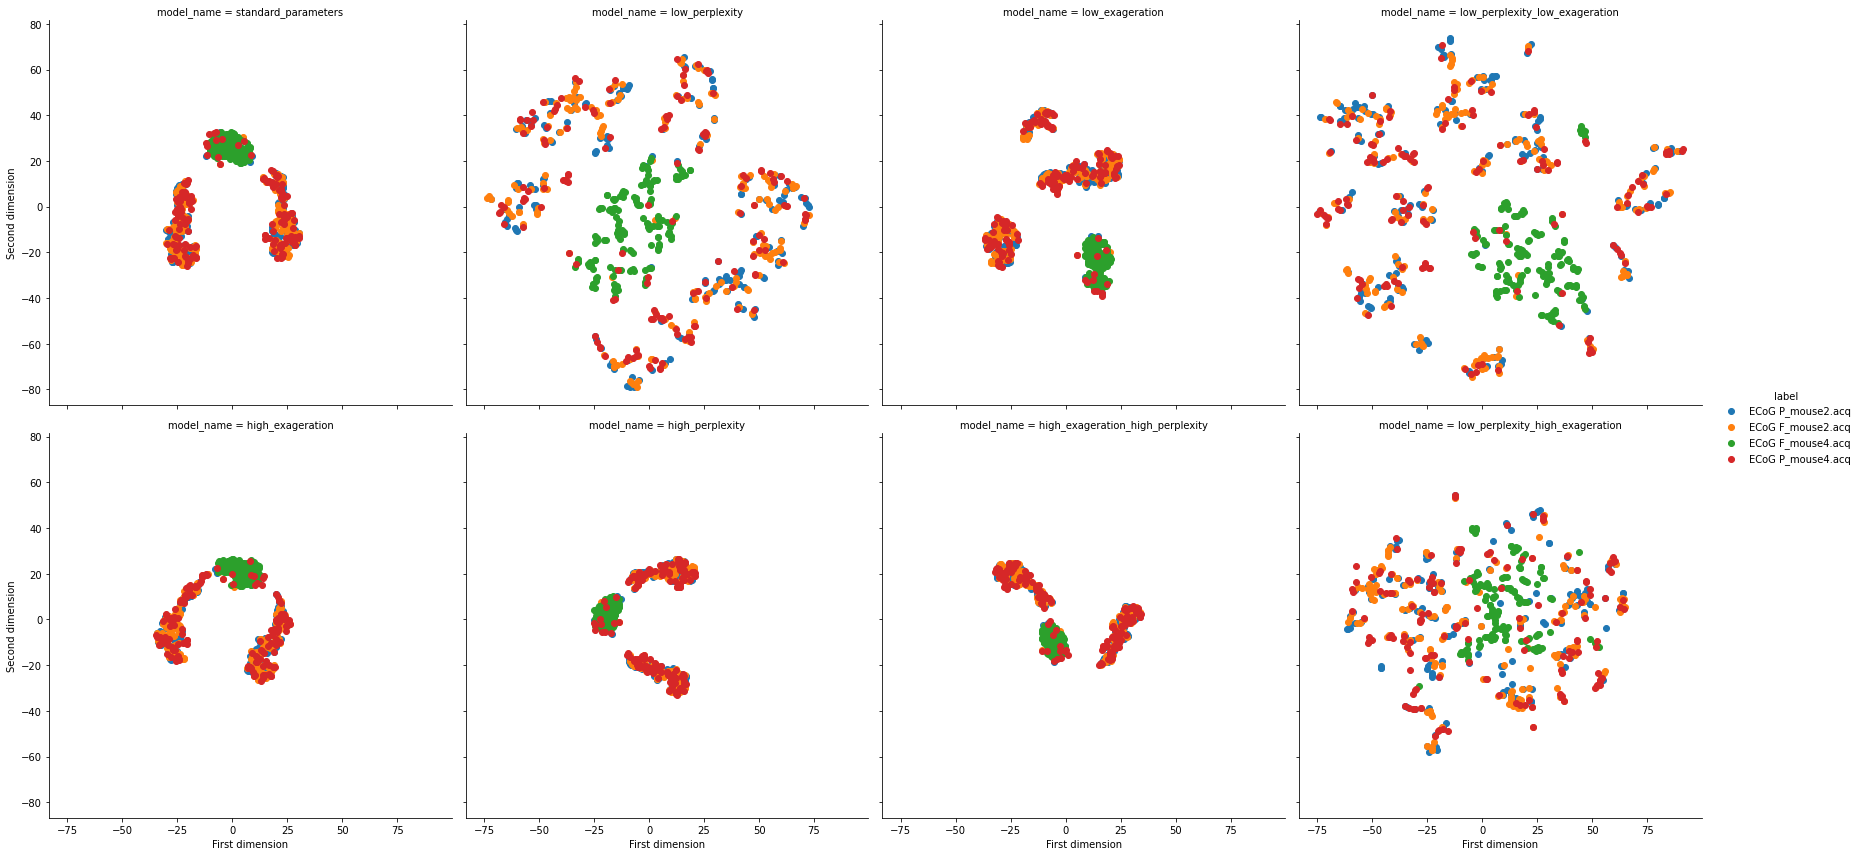

In [30]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse2.acq", "mouse4.acq"], eeg_channels=["ECoG F", "ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()

##### Mouse2 and Mouse4 with respect to Frontal lobe

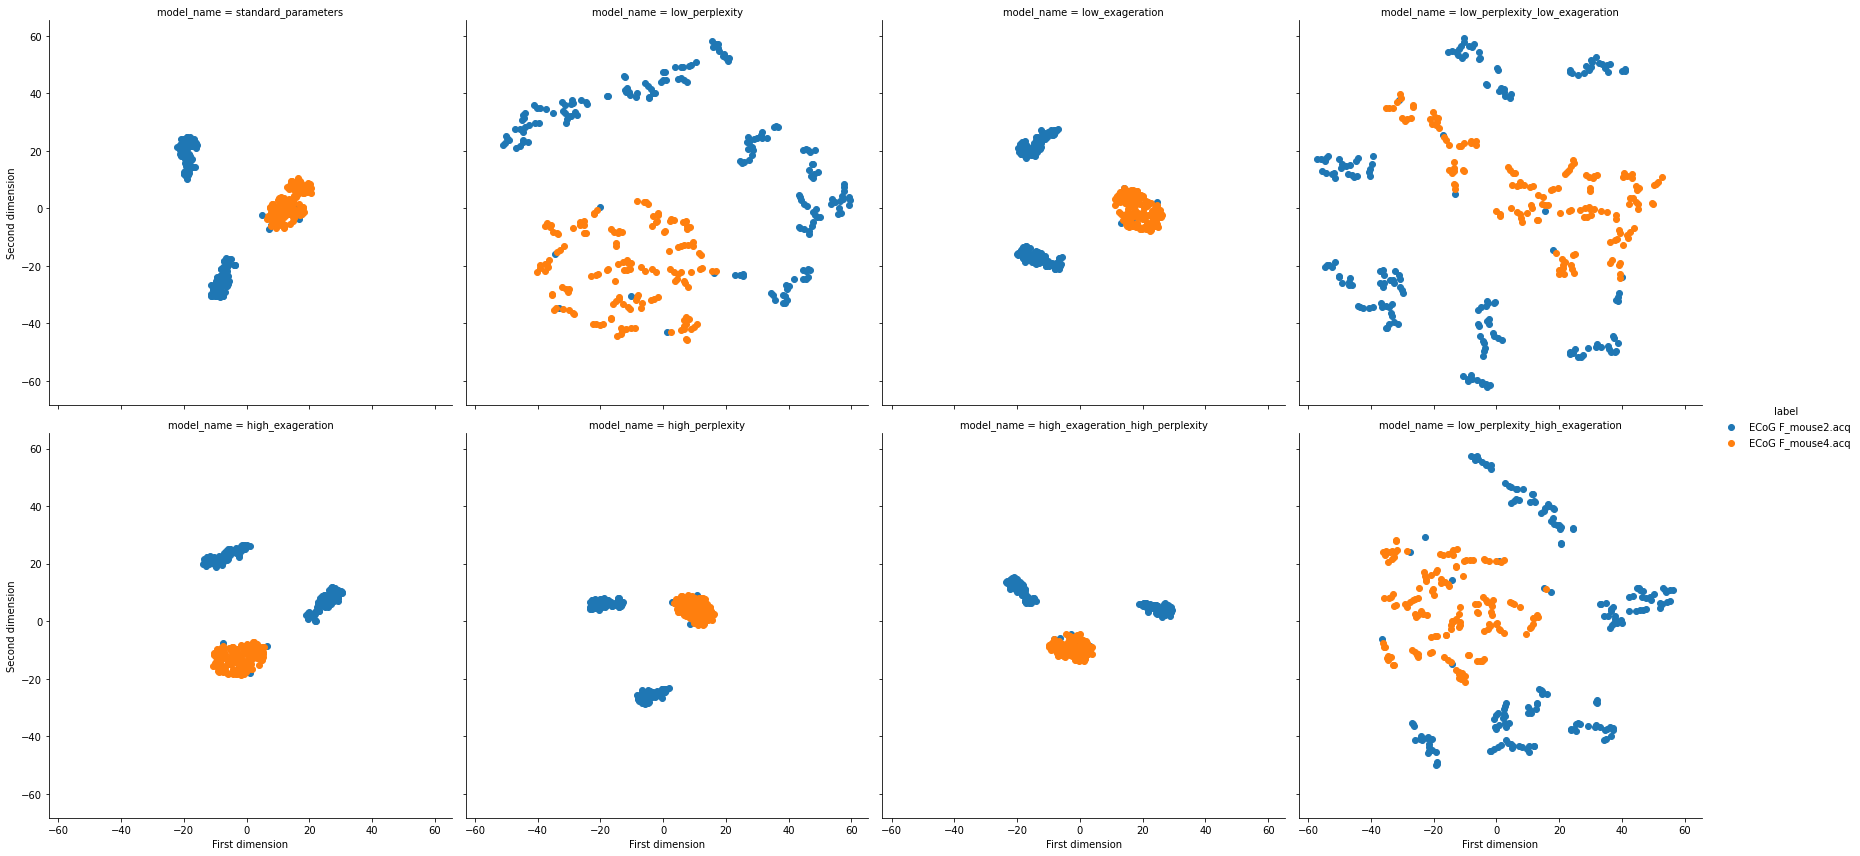

In [31]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse2.acq", "mouse4.acq"], eeg_channels=["ECoG F"])
eeg_visualizer.execute()
eeg_visualizer.plot()

##### Mouse2 and Mouse4 with respect to Parietal lobe

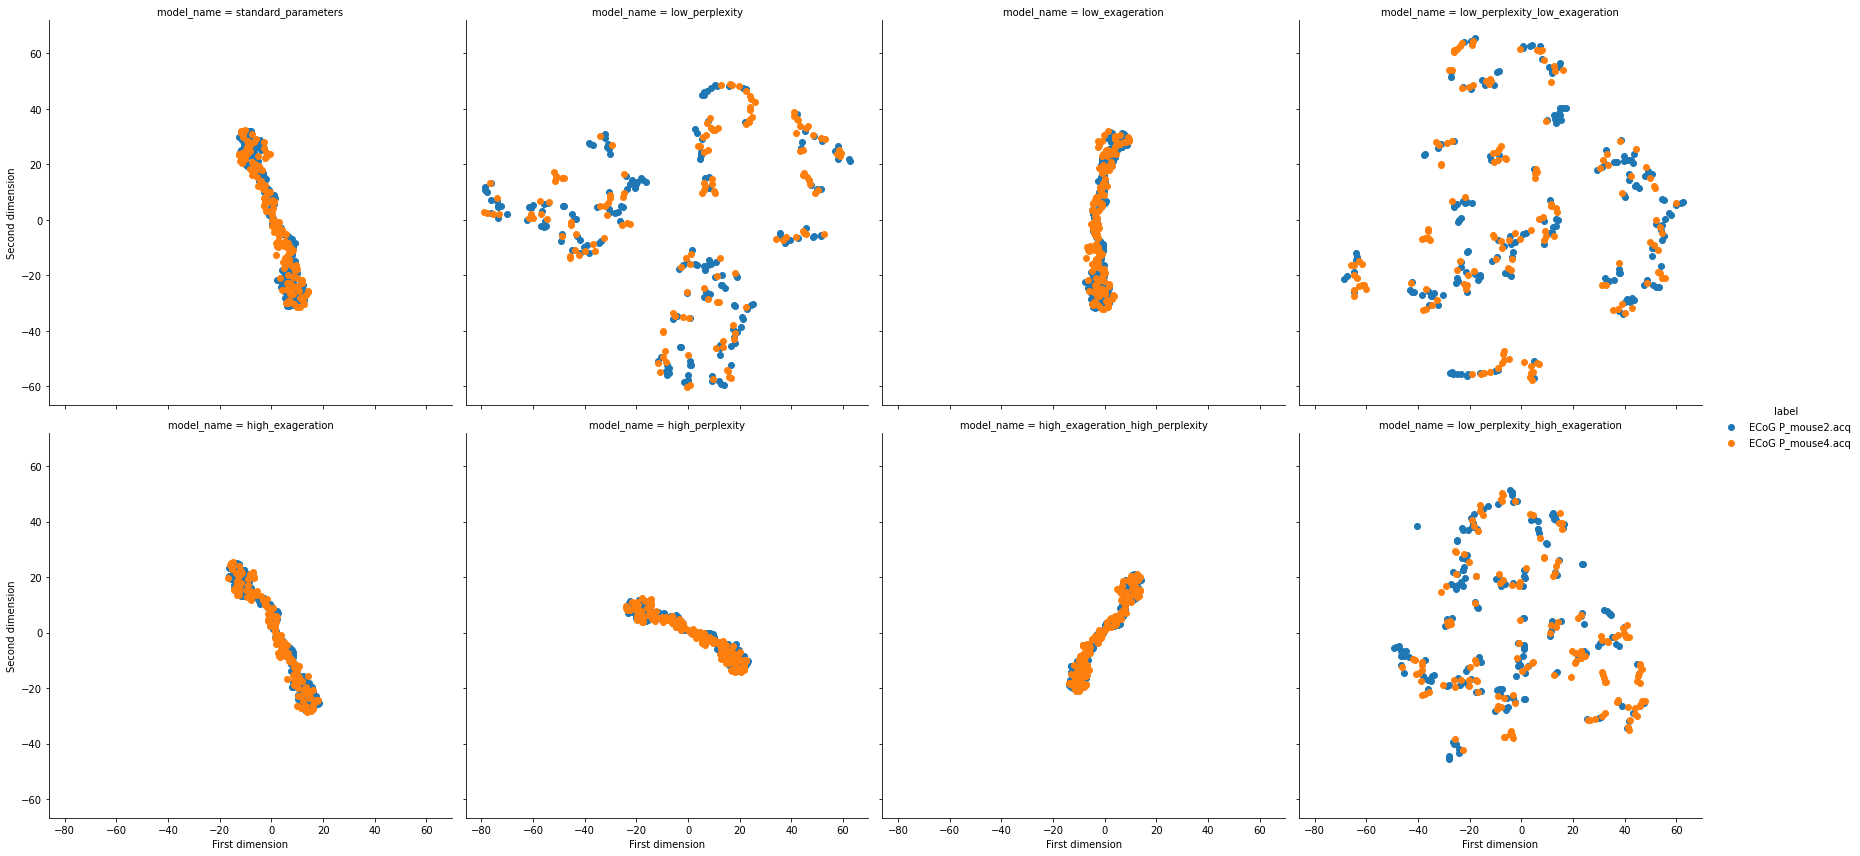

In [32]:
eeg_visualizer = EEGVisualizer()
eeg_visualizer.build(files_name=["mouse2.acq", "mouse4.acq"], eeg_channels=["ECoG P"])
eeg_visualizer.execute()
eeg_visualizer.plot()